In [1]:
# %pip install numpy pandas kagglehub scikit-learn matplotlib

## Libraries and data loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/adult.csv")
df.info()

/home/diggspapu/responsibleAI-proyecto01/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/diggspapu/.cache/kagglehub/datasets/uciml/adult-census-income/versions/3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage:

In [3]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

## Missing values

In [9]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values, {df[df[col].isnull()].shape[0]} missing values and {df[df[col]=='?'].shape[0]} values as ?, {df[col].dtype}")

age: 73 unique values, 0 missing values and 0 values as ?, int64
workclass: 9 unique values, 0 missing values and 1836 values as ?, category
fnlwgt: 21648 unique values, 0 missing values and 0 values as ?, int64
education: 16 unique values, 0 missing values and 0 values as ?, category
education.num: 16 unique values, 0 missing values and 0 values as ?, int64
marital.status: 7 unique values, 0 missing values and 0 values as ?, category
occupation: 15 unique values, 0 missing values and 1843 values as ?, category
relationship: 6 unique values, 0 missing values and 0 values as ?, category
race: 5 unique values, 0 missing values and 0 values as ?, category
sex: 2 unique values, 0 missing values and 0 values as ?, category
capital.gain: 119 unique values, 0 missing values and 0 values as ?, int64
capital.loss: 92 unique values, 0 missing values and 0 values as ?, int64
hours.per.week: 94 unique values, 0 missing values and 0 values as ?, int64
native.country: 42 unique values, 0 missing val

## Preliminar Description

In [5]:
df.describe(include='all')

age workclass        fnlwgt education  education.num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

            marital.status      occupation relationship   race    sex  \
count                32561           32561        32561  32561  32561   
unique                   7              15            6      5      2   
top     Married-civ-spouse  Prof-specialty      Husband  White   Male   
freq                 14976            4140        13193  27816  21790   
mean                   NaN             NaN          NaN    NaN    NaN   
std                    NaN             NaN          NaN    NaN    NaN   
min                    NaN             NaN          NaN    NaN    NaN   
25%                    NaN             NaN          NaN    NaN    NaN   
50%                    NaN             NaN          NaN    NaN    NaN   
75%                    NaN             NaN          NaN    NaN    NaN   
max                    NaN             NaN          NaN    NaN    NaN   

        capital.gain  capital.loss  hours.per.week native.country income  
count   32561.000000  32561.000000    32561.000000          32561  32561  
unique           NaN           NaN             NaN             42      2  
top              NaN           NaN             NaN  United-States  <=50K  
freq             NaN           NaN             NaN          29170  24720  
mean     1077.648844     87.303830       40.437456            NaN    NaN  
std      7385.292085    402.960219       12.347429            NaN    NaN  
min         0.000000      0.000000        1.000000            NaN    NaN  
25%         0.000000      0.000000       40.000000            NaN    NaN  
50%         0.000000      0.000000       40.000000            NaN    NaN  
75%         0.000000      0.000000       45.000000            NaN    NaN  
max     99999.000000   4356.000000       99.000000            NaN    NaN

## Exploration of Cualitative Variables

### Exploration of variable by variable

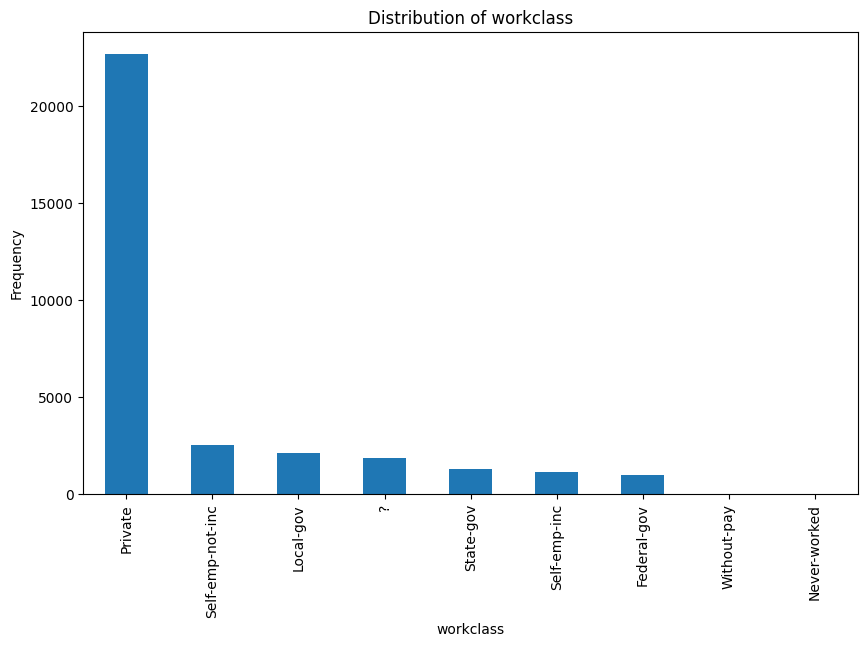

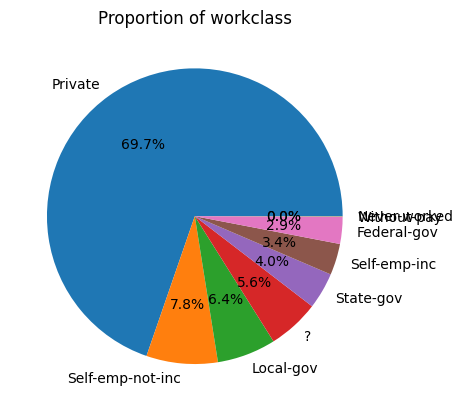

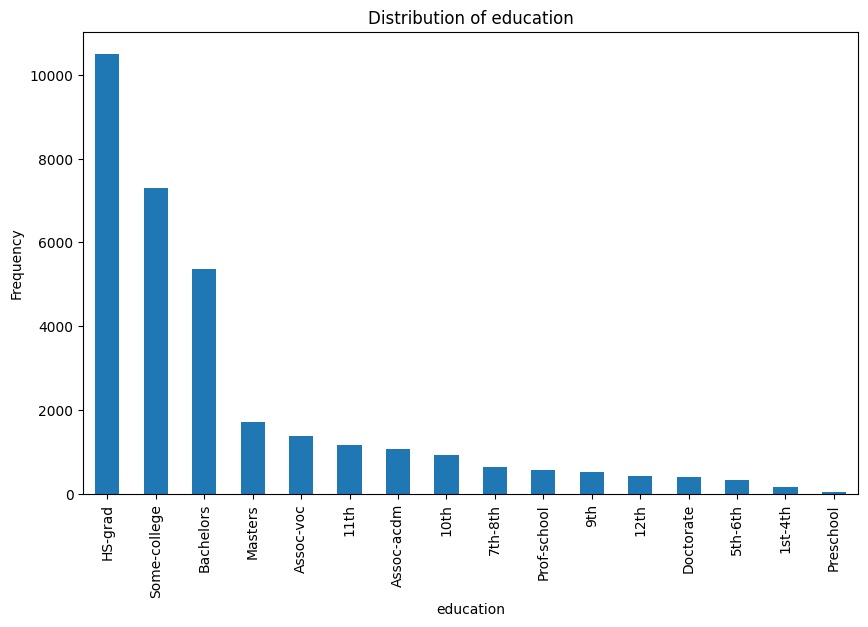

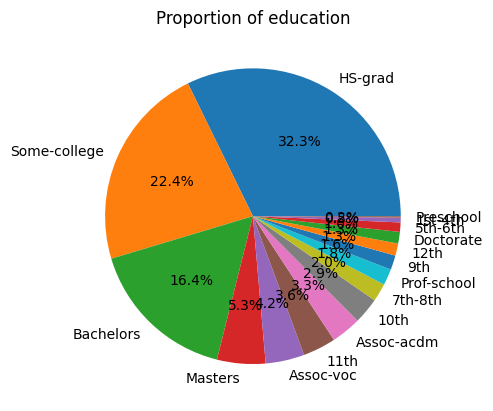

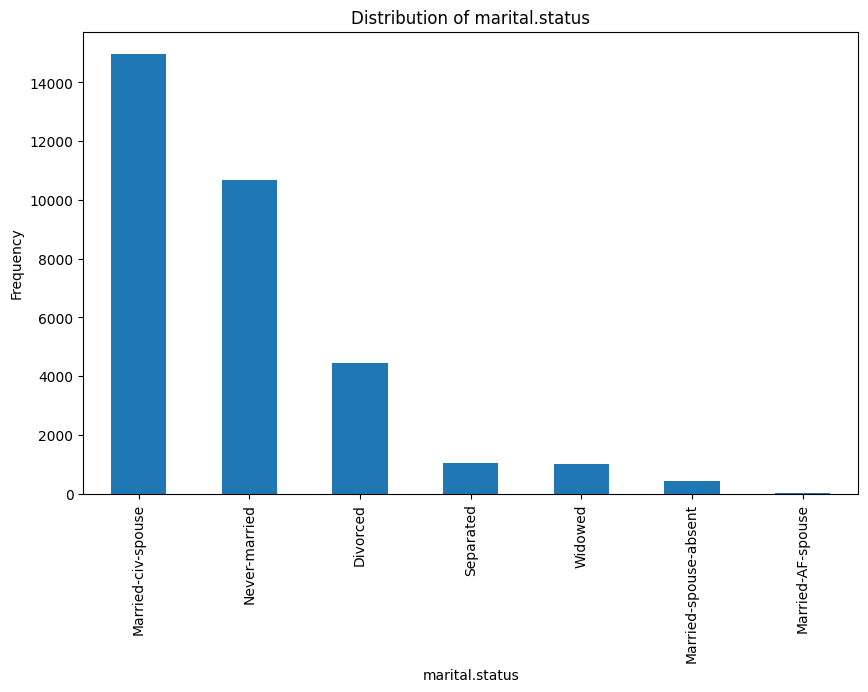

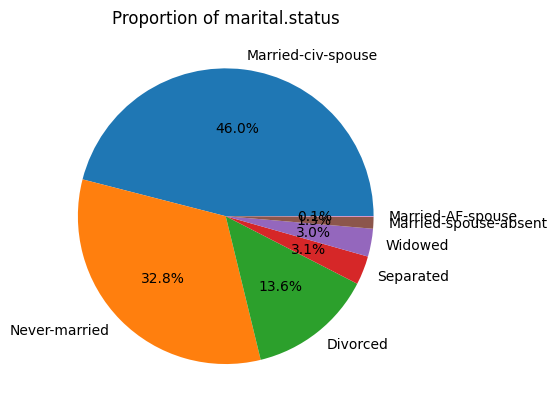

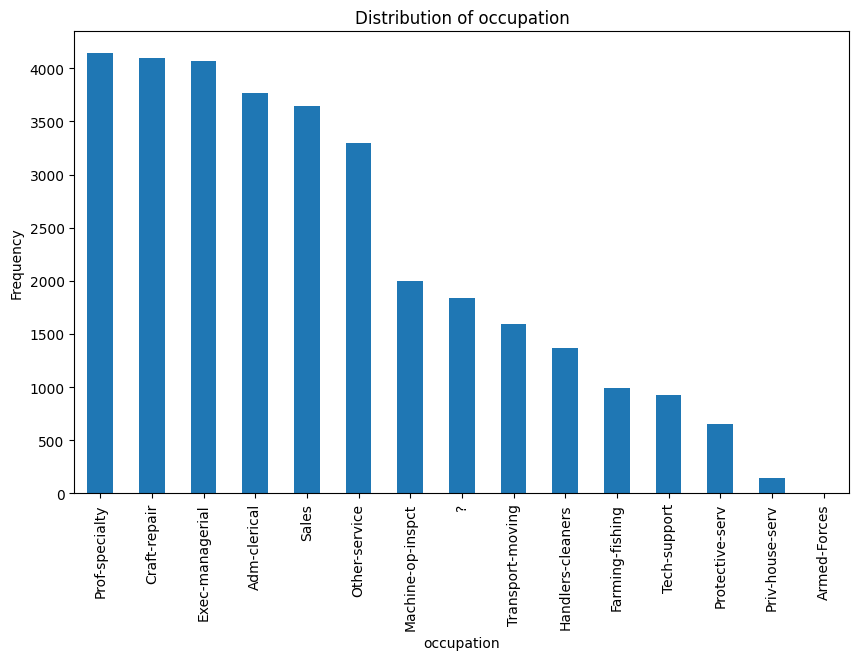

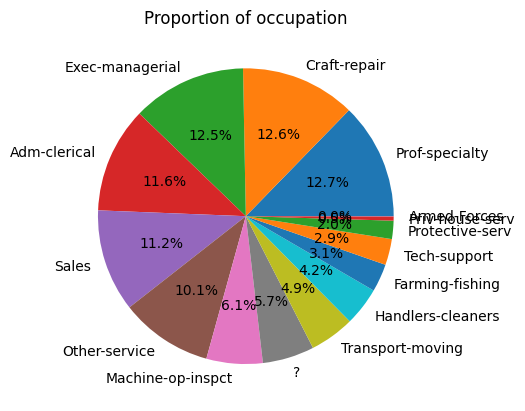

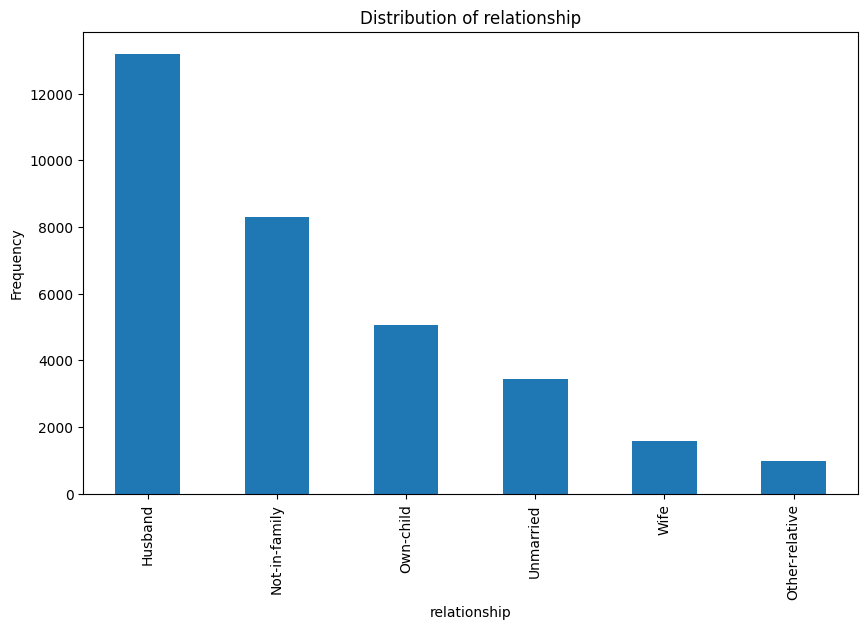

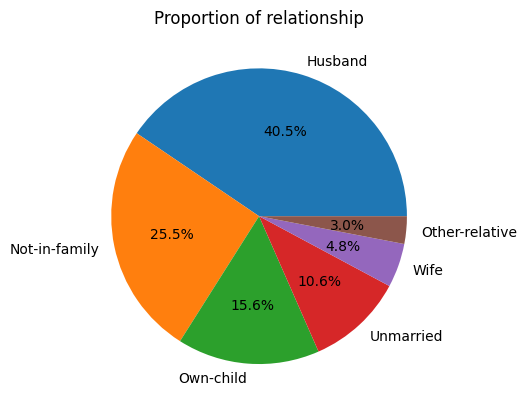

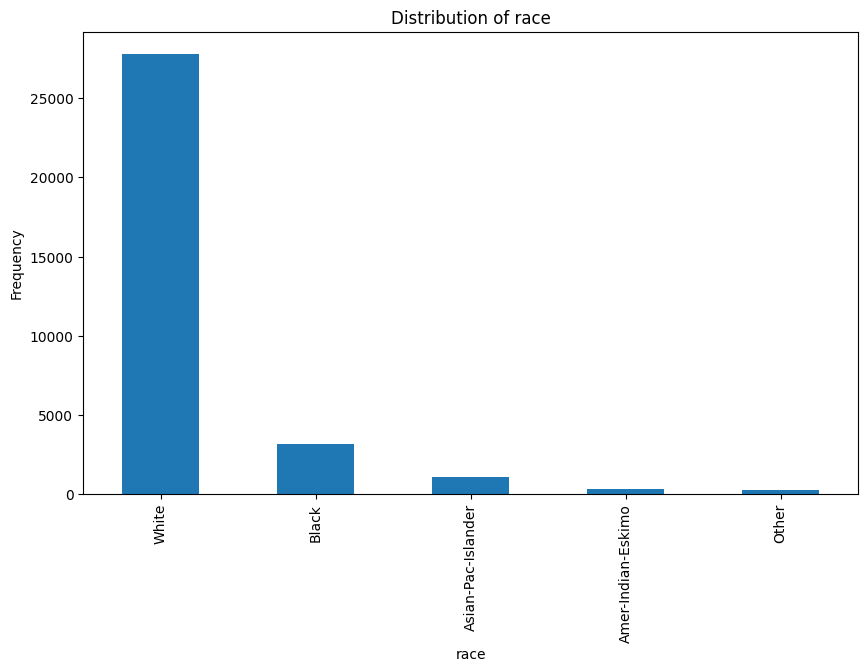

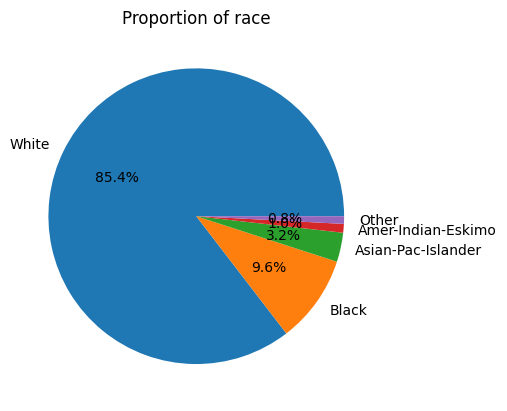

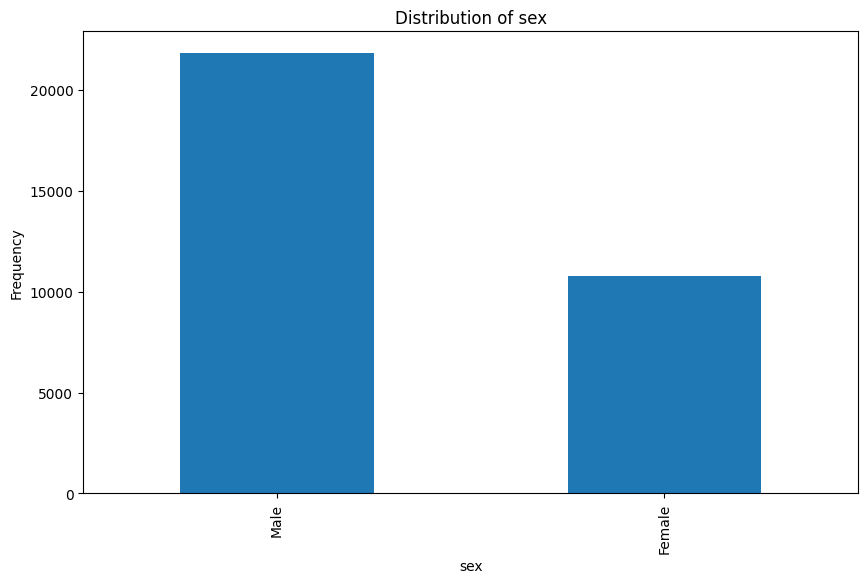

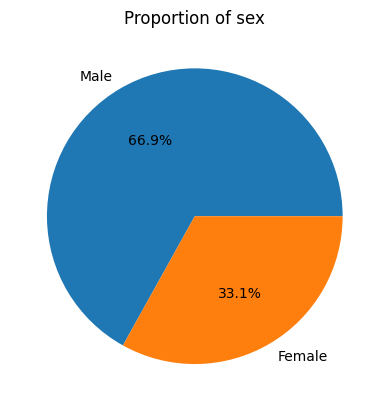

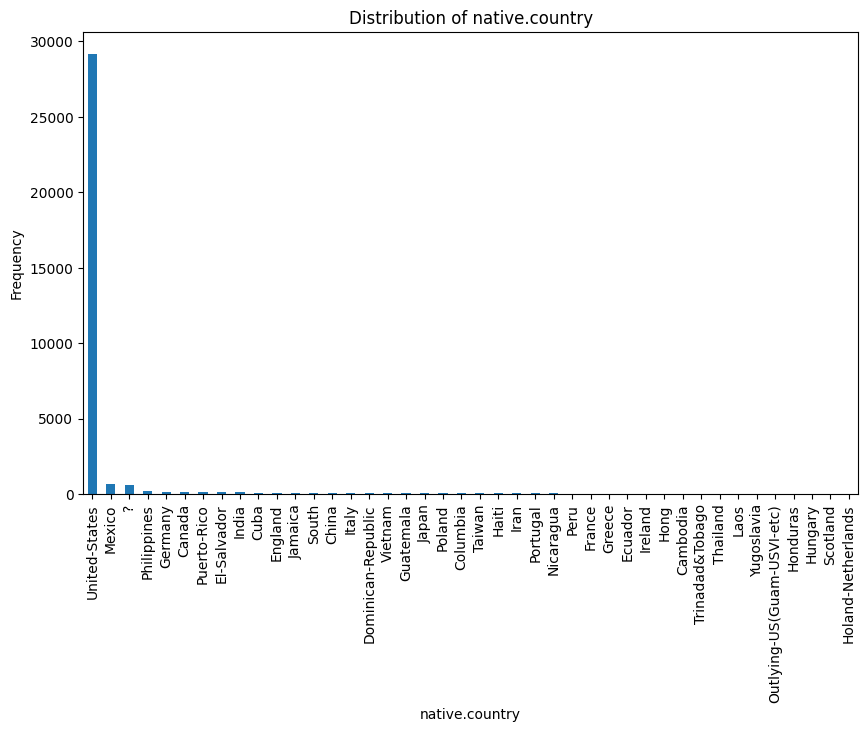

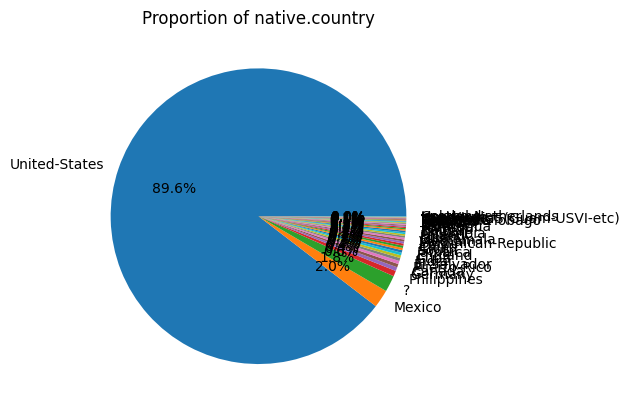

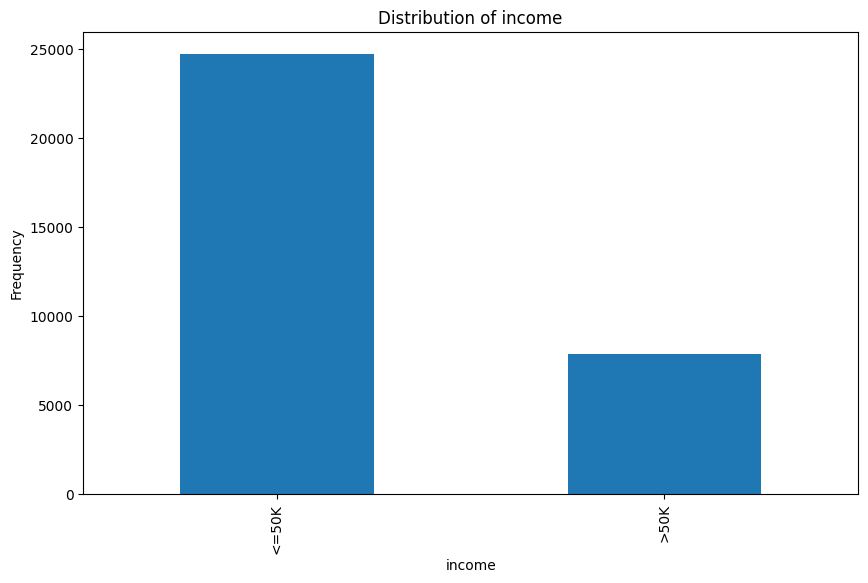

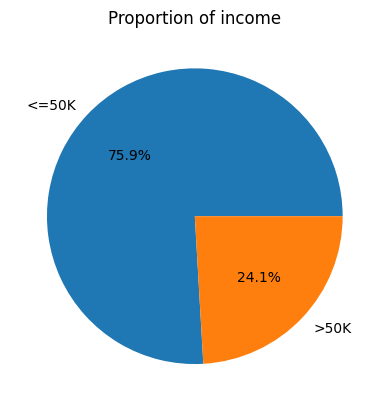

In [6]:
for col in df.select_dtypes(include=['category']).columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    plt.pie(df[col].value_counts(normalize=True), labels=df[col].value_counts().index, autopct='%1.1f%%')
    plt.title(f"Proportion of {col}")
    plt.show()

### Multi variable exploration

<Figure size 1000x600 with 0 Axes>

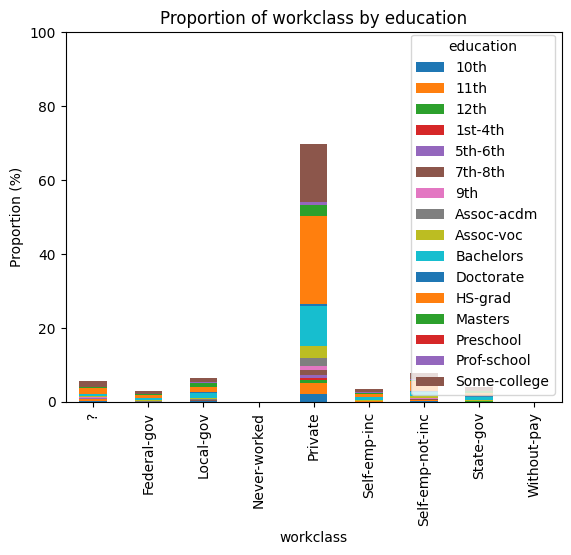

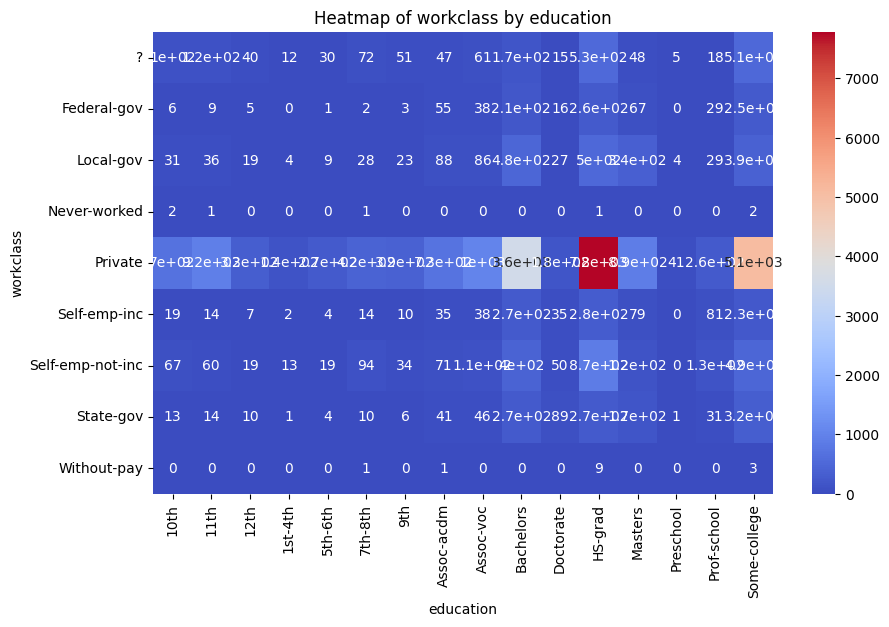

<Figure size 1000x600 with 0 Axes>

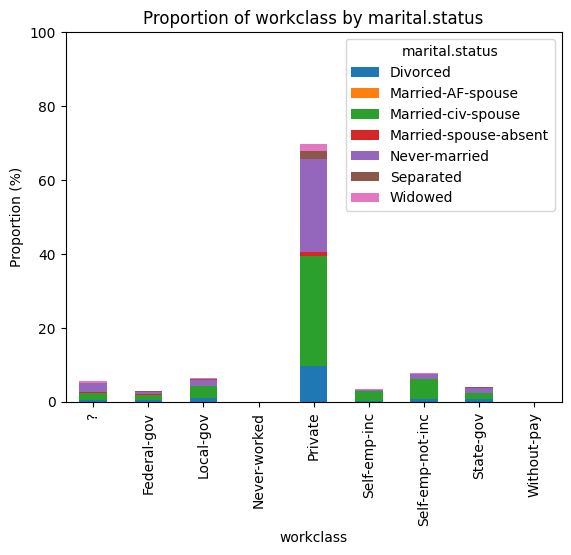

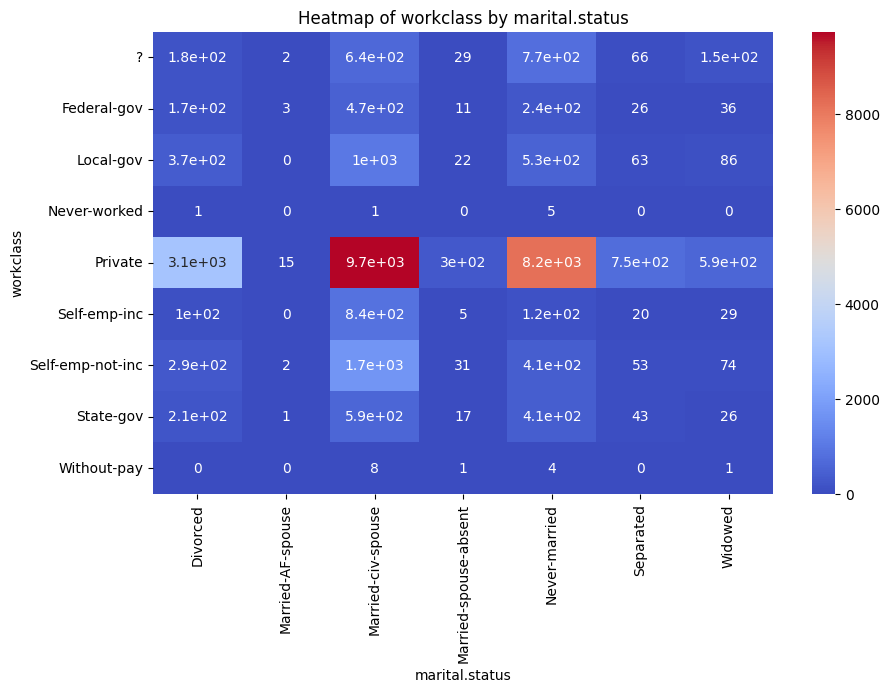

<Figure size 1000x600 with 0 Axes>

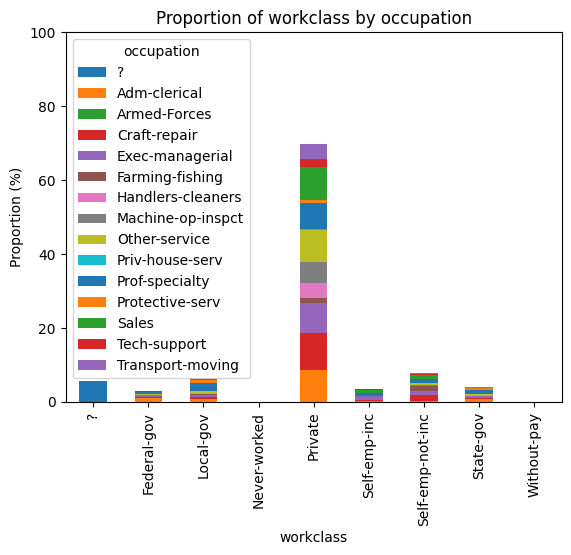

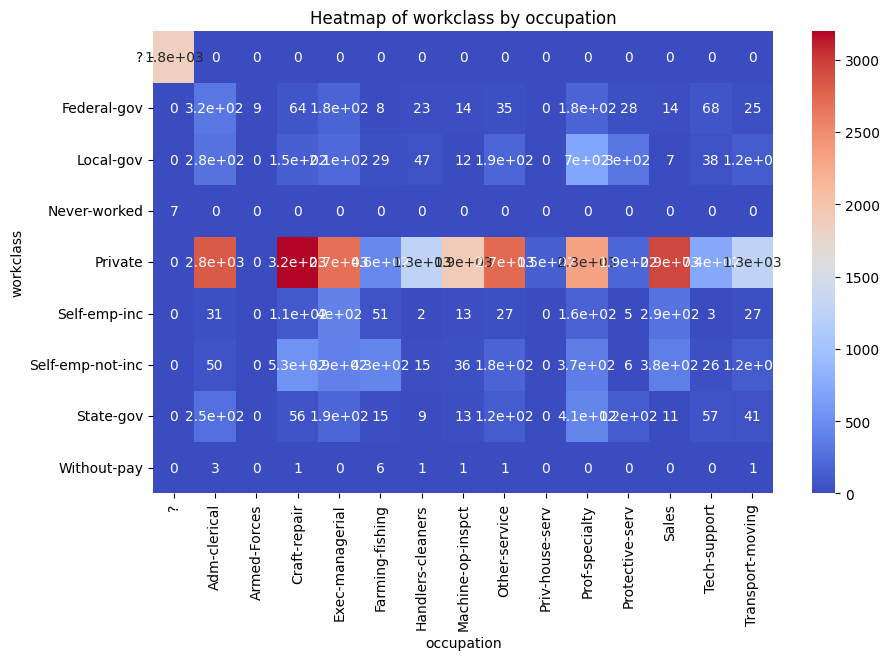

<Figure size 1000x600 with 0 Axes>

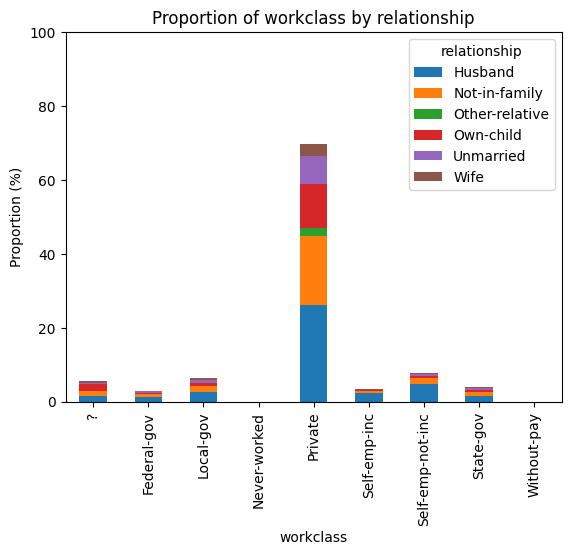

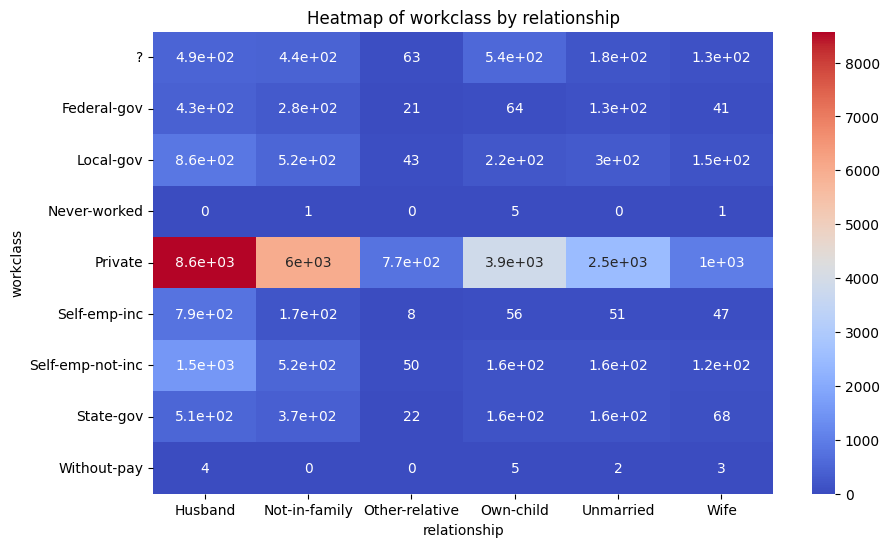

<Figure size 1000x600 with 0 Axes>

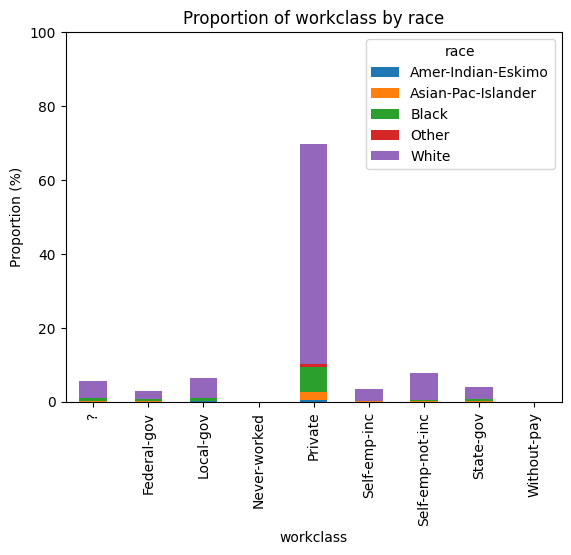

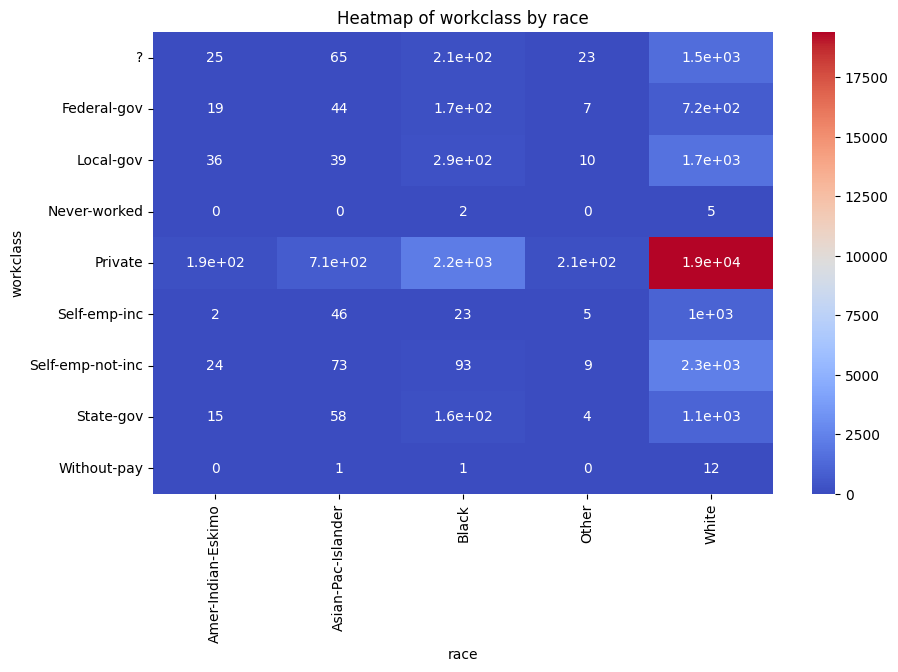

<Figure size 1000x600 with 0 Axes>

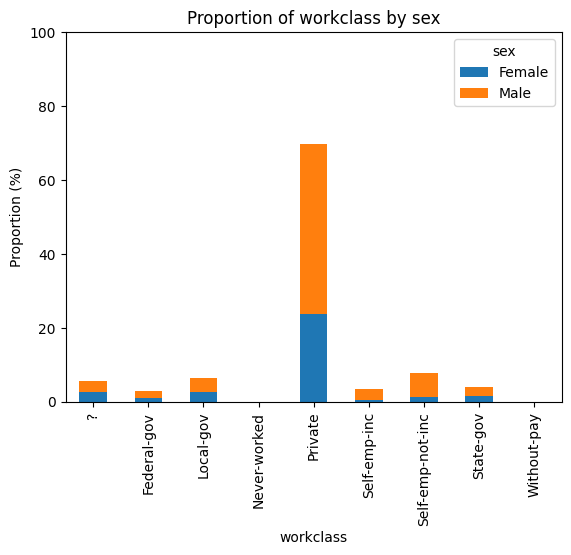

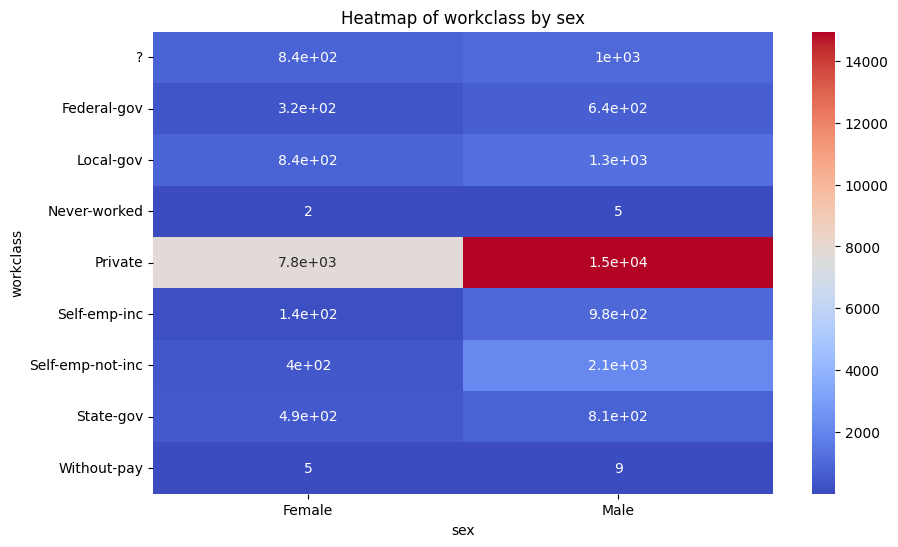

<Figure size 1000x600 with 0 Axes>

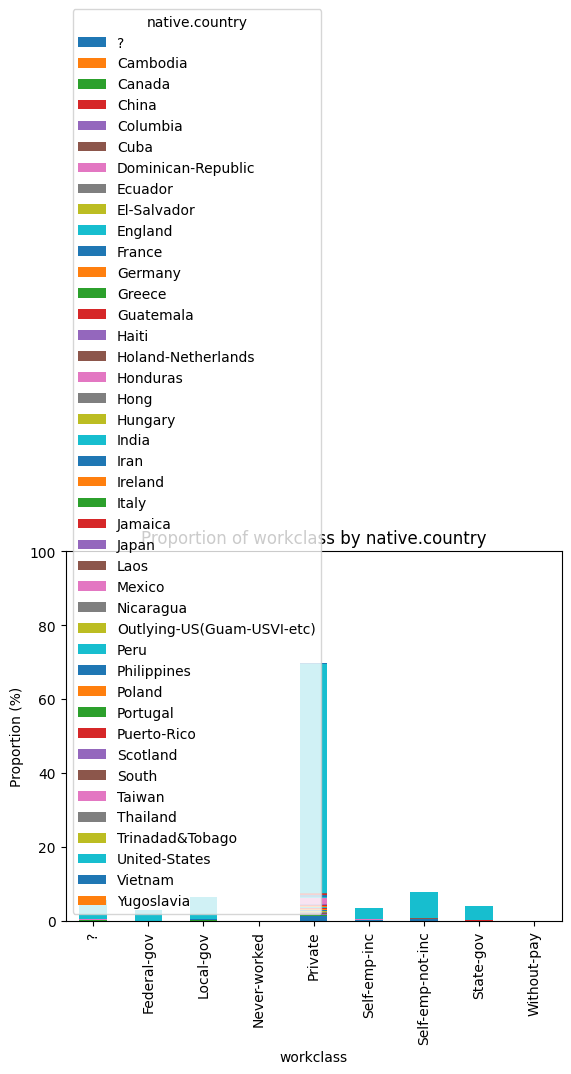

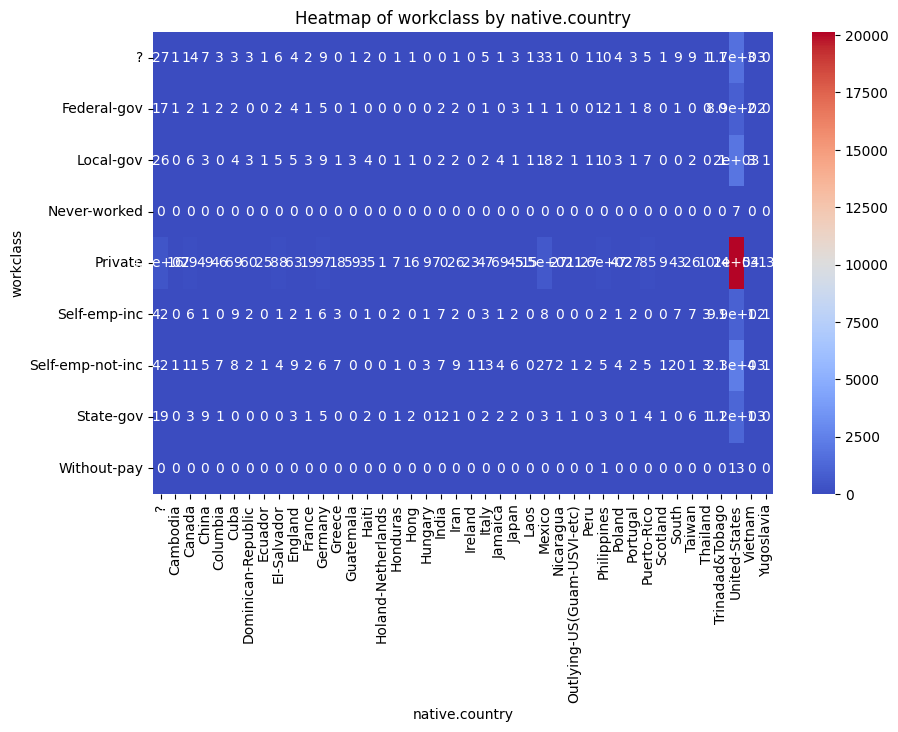

<Figure size 1000x600 with 0 Axes>

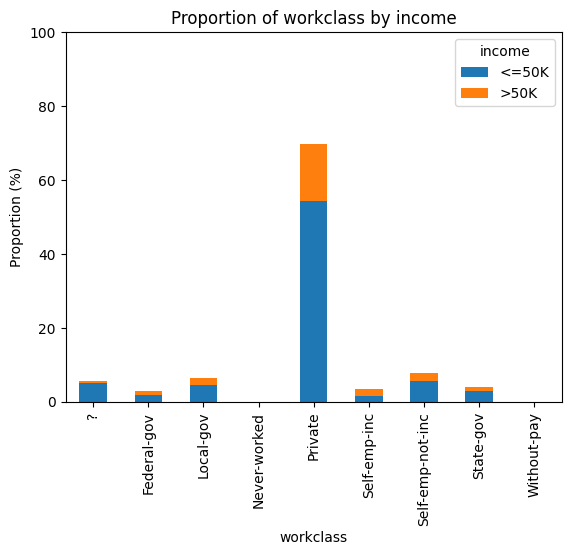

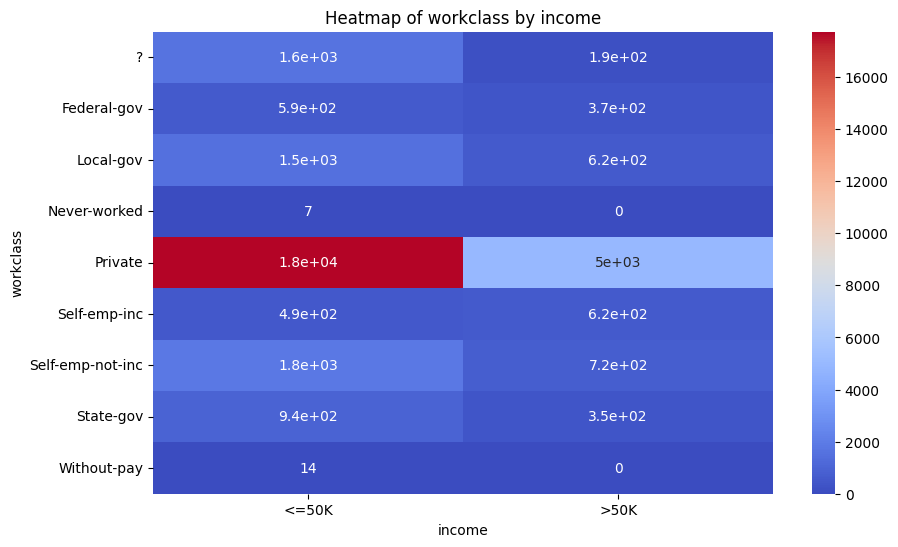

<Figure size 1000x600 with 0 Axes>

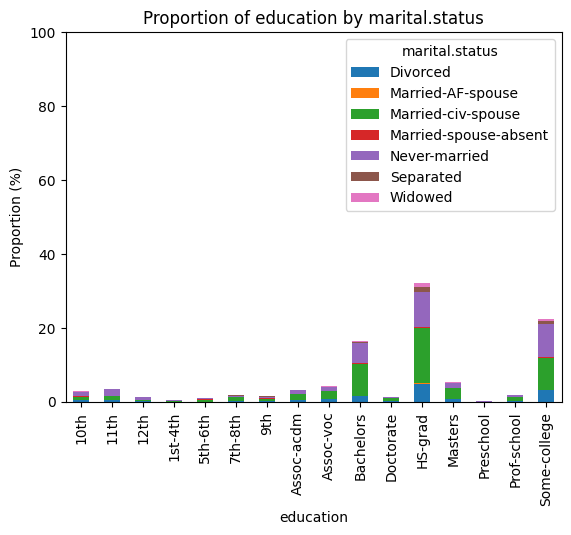

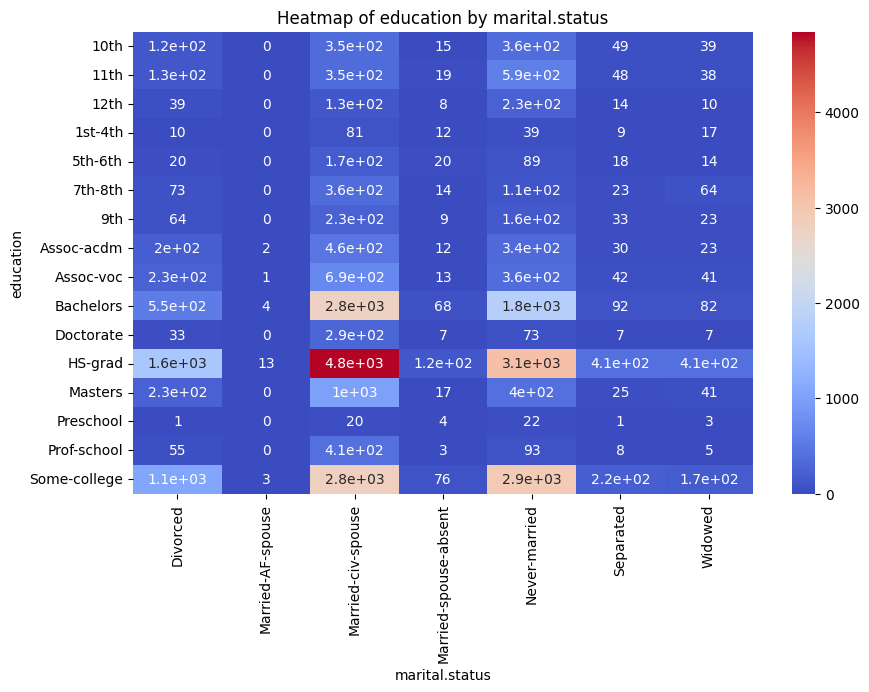

<Figure size 1000x600 with 0 Axes>

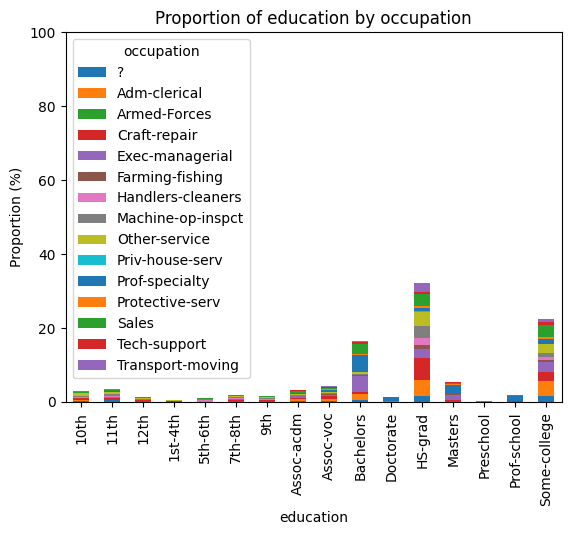

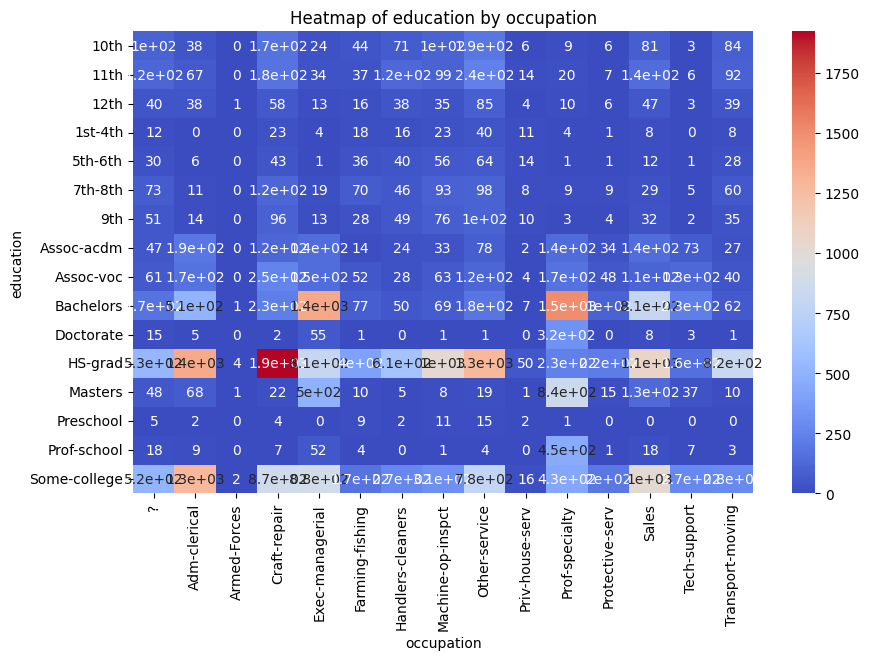

<Figure size 1000x600 with 0 Axes>

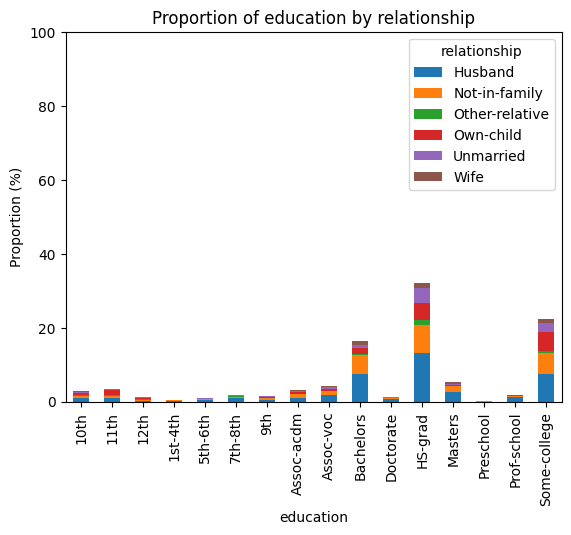

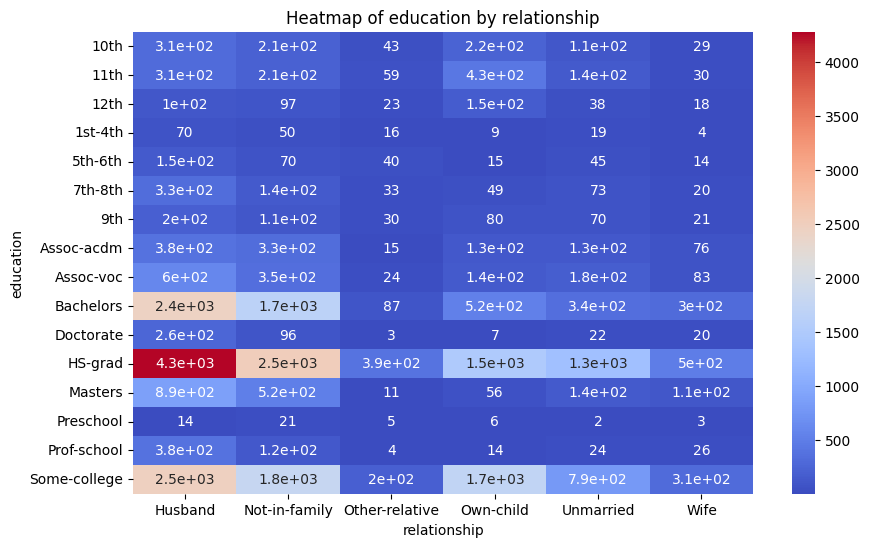

<Figure size 1000x600 with 0 Axes>

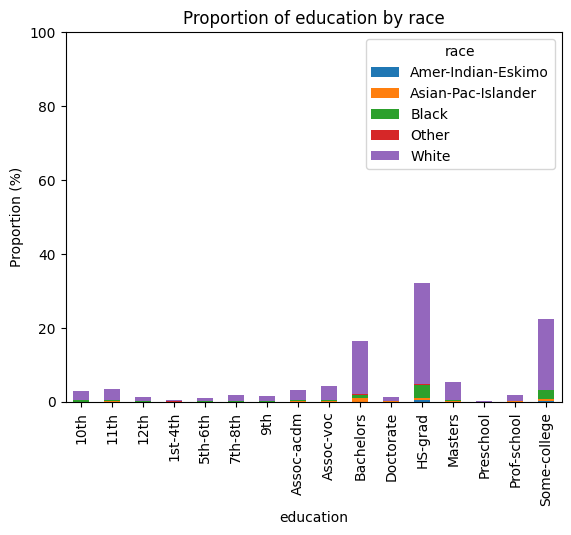

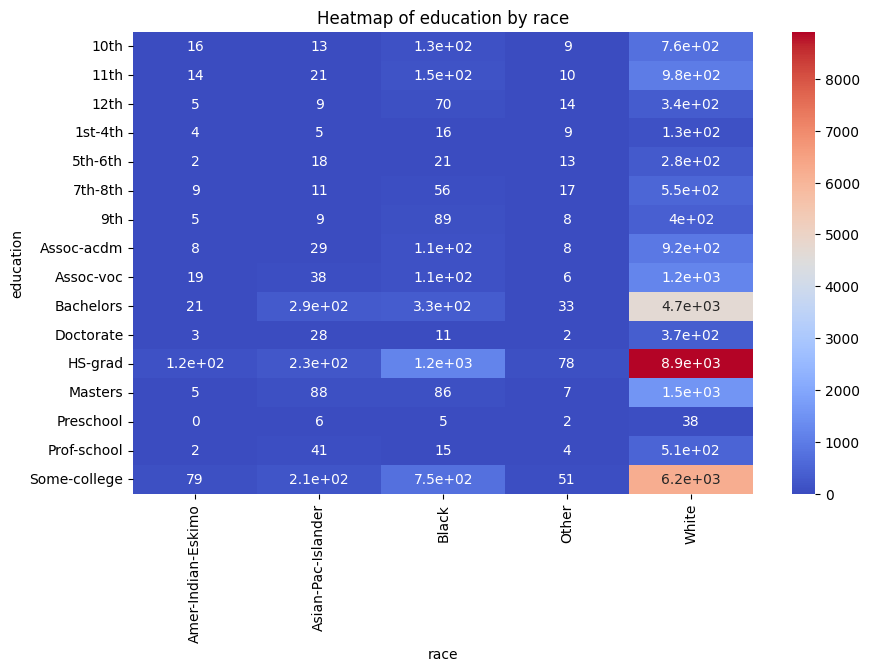

<Figure size 1000x600 with 0 Axes>

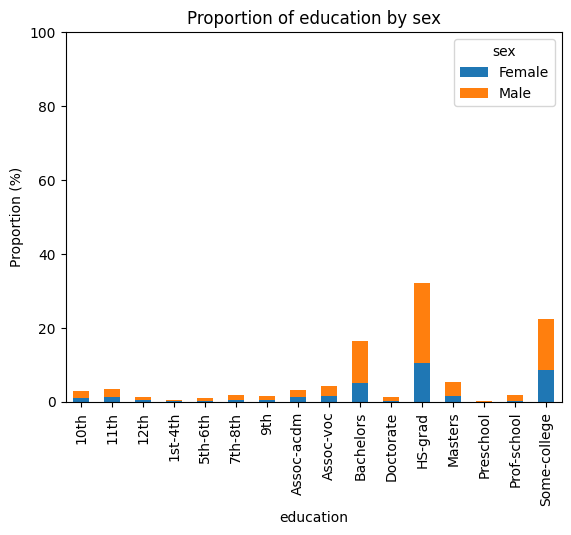

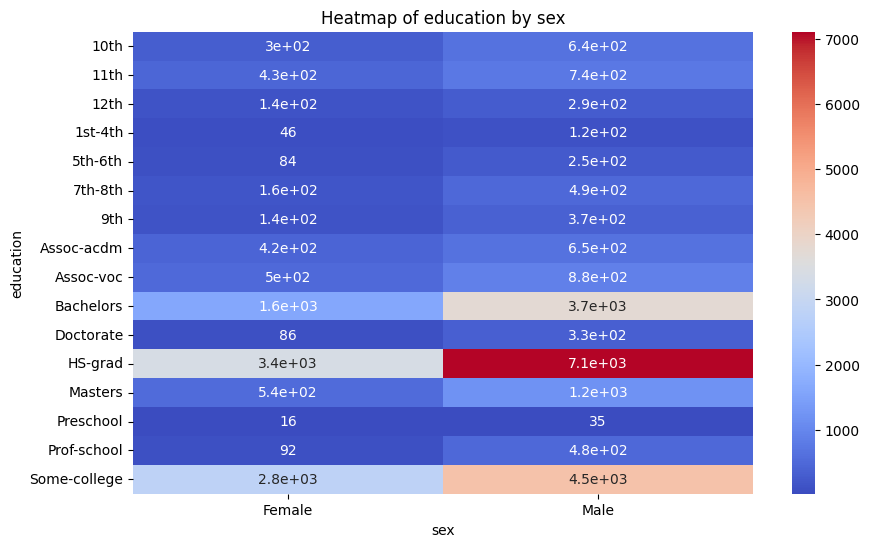

<Figure size 1000x600 with 0 Axes>

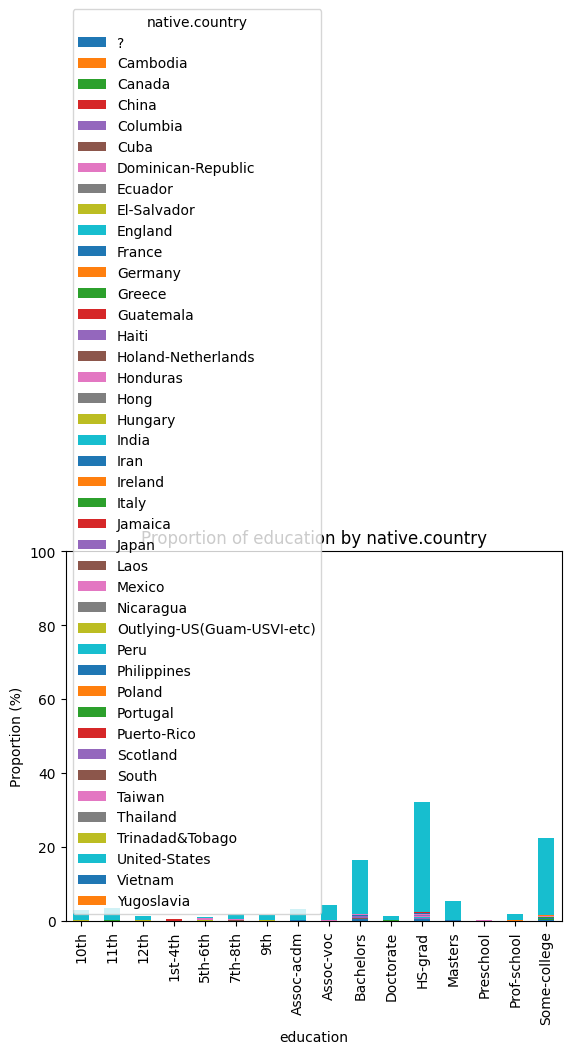

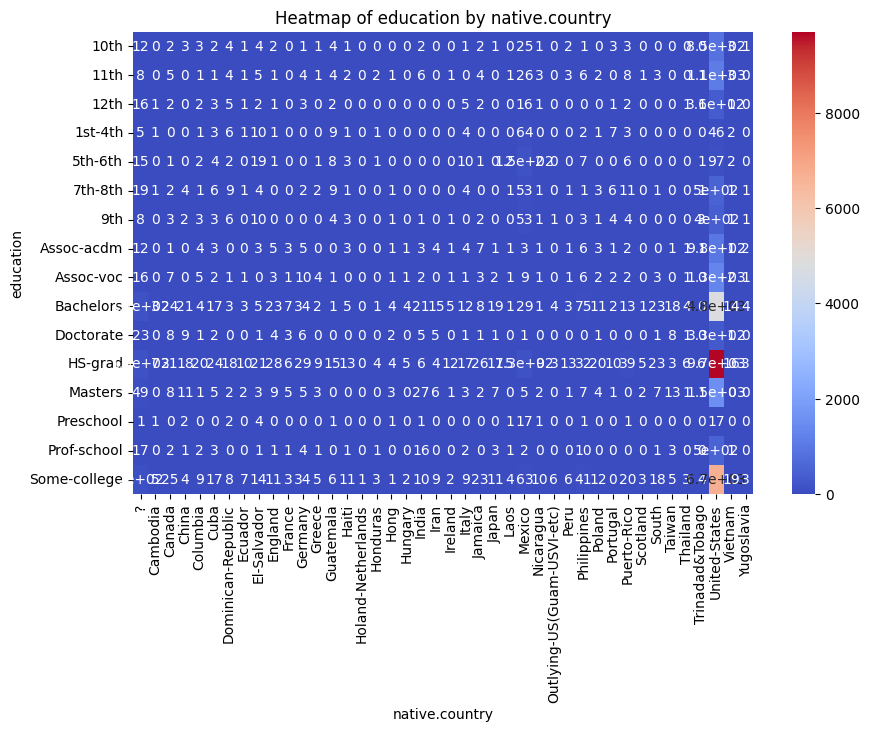

<Figure size 1000x600 with 0 Axes>

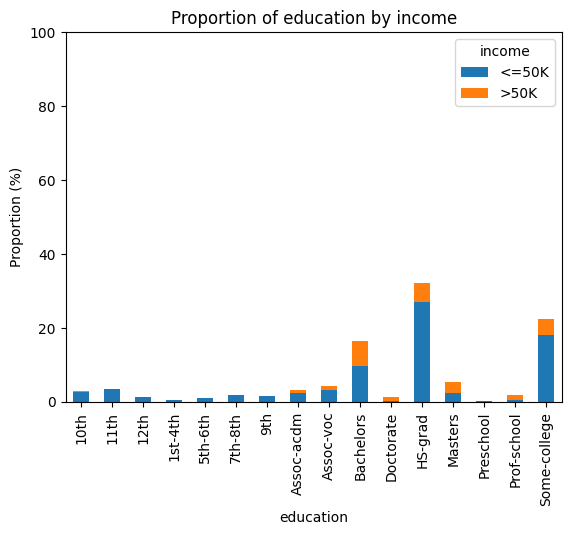

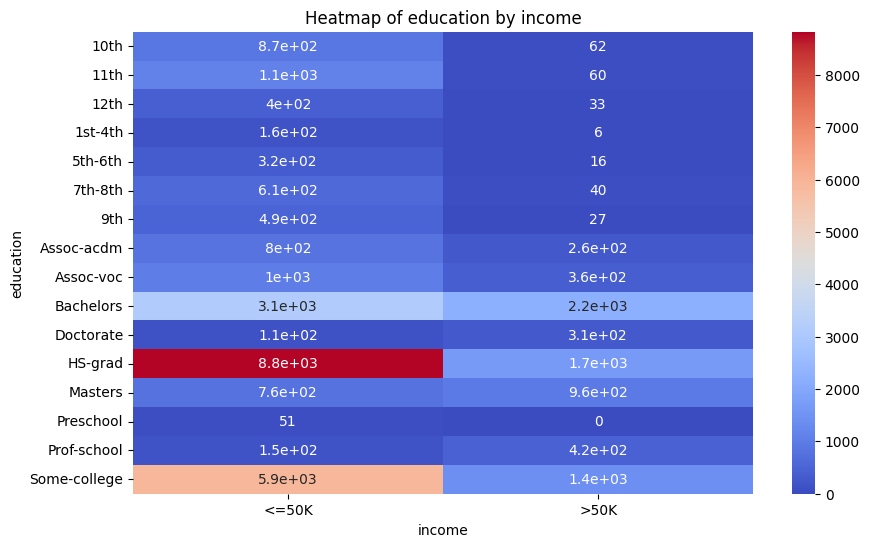

<Figure size 1000x600 with 0 Axes>

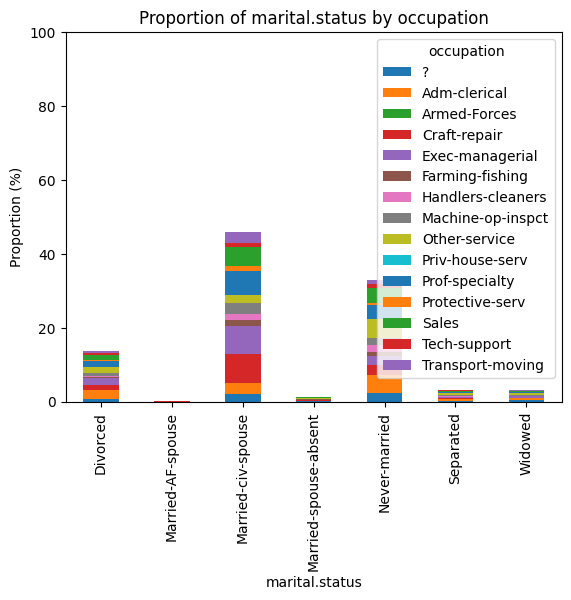

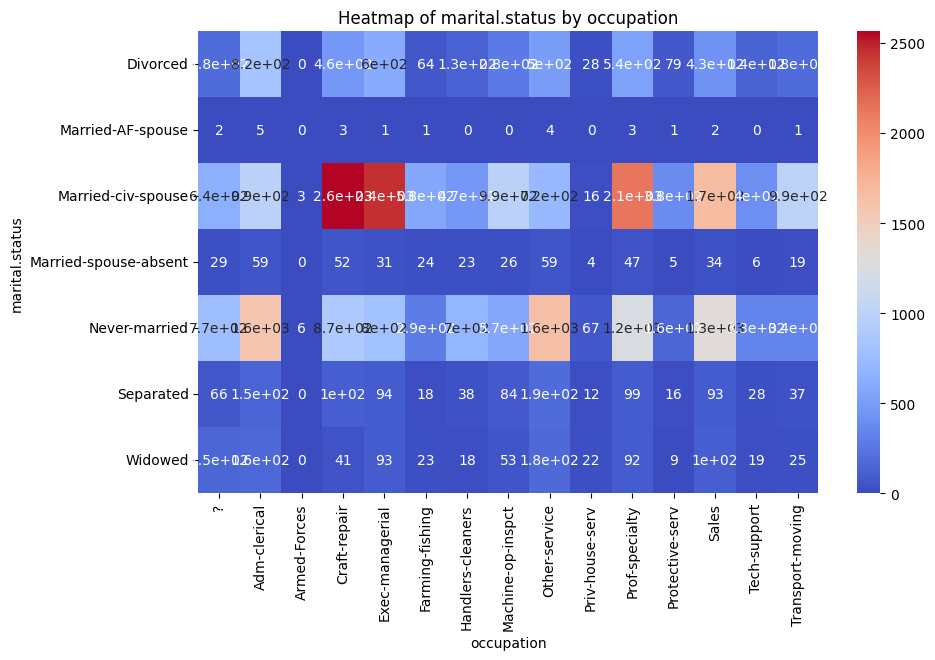

<Figure size 1000x600 with 0 Axes>

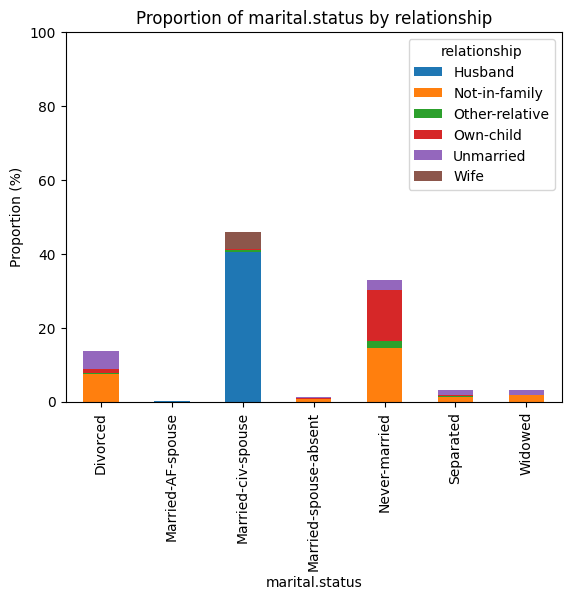

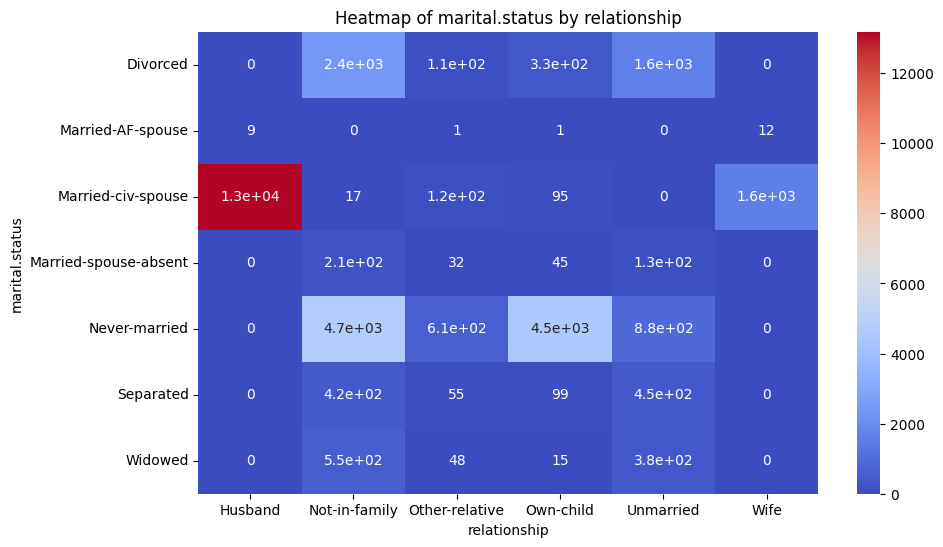

<Figure size 1000x600 with 0 Axes>

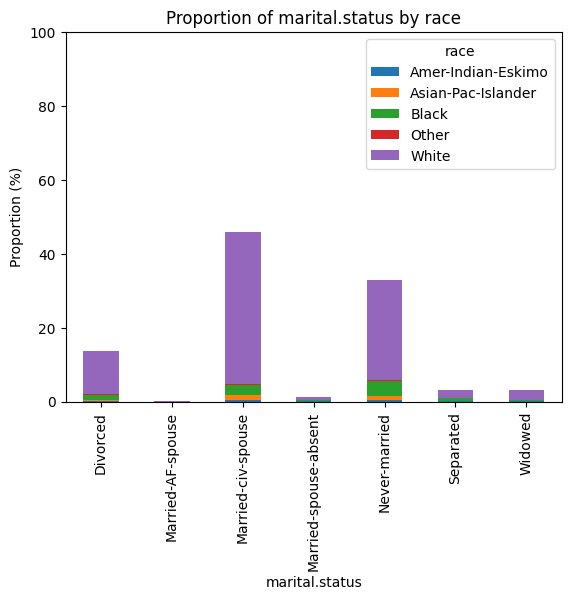

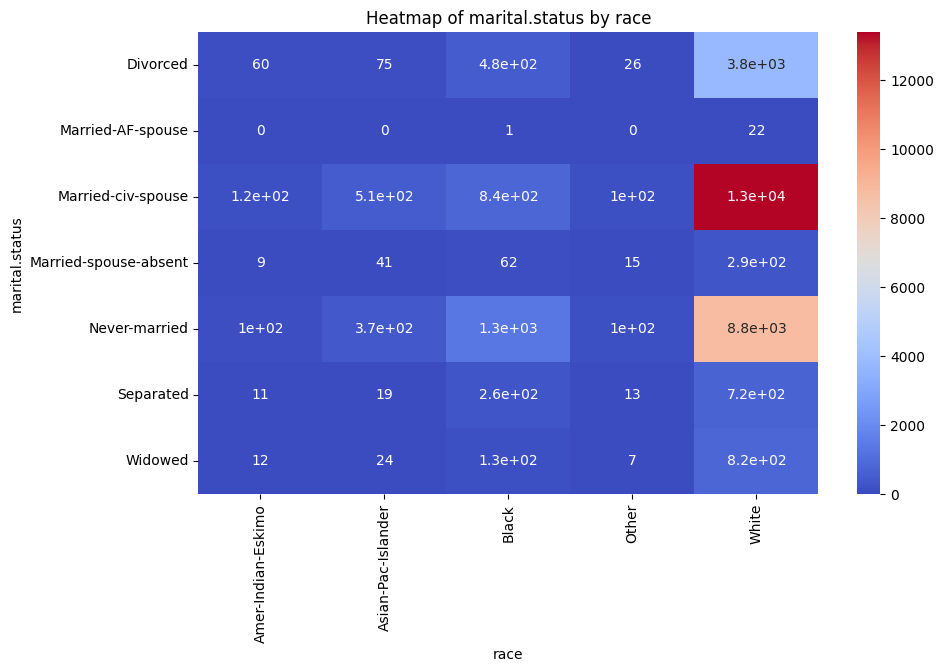

<Figure size 1000x600 with 0 Axes>

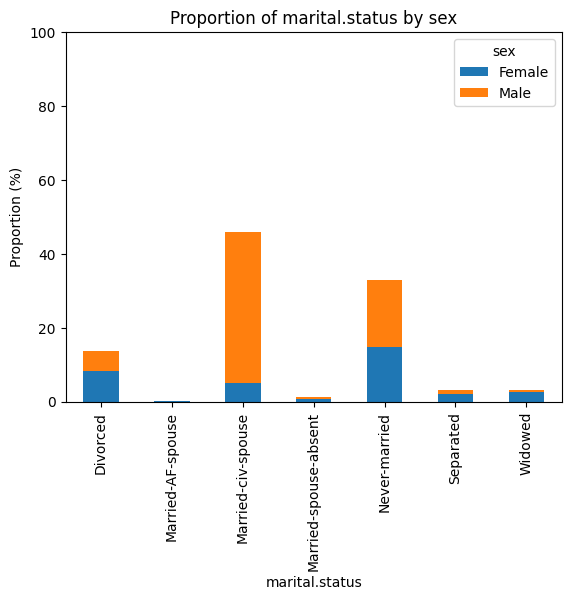

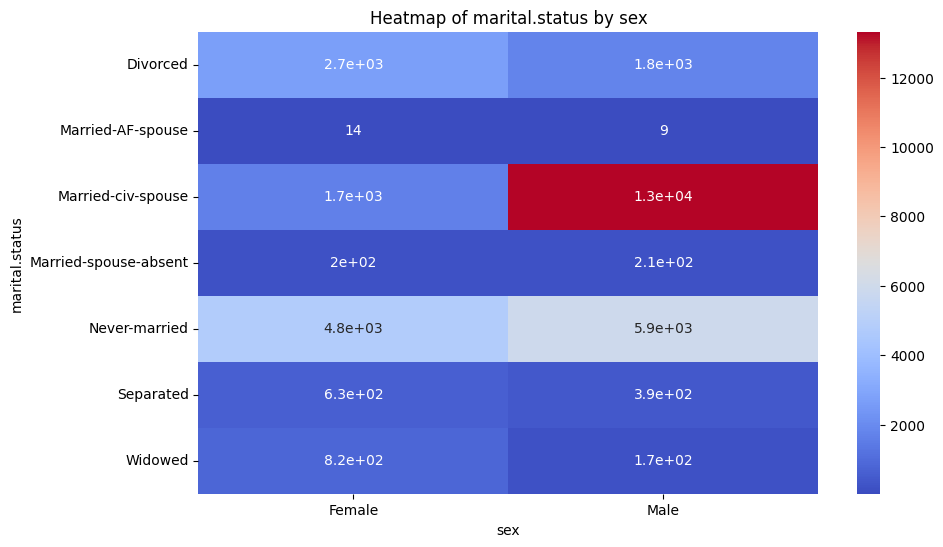

<Figure size 1000x600 with 0 Axes>

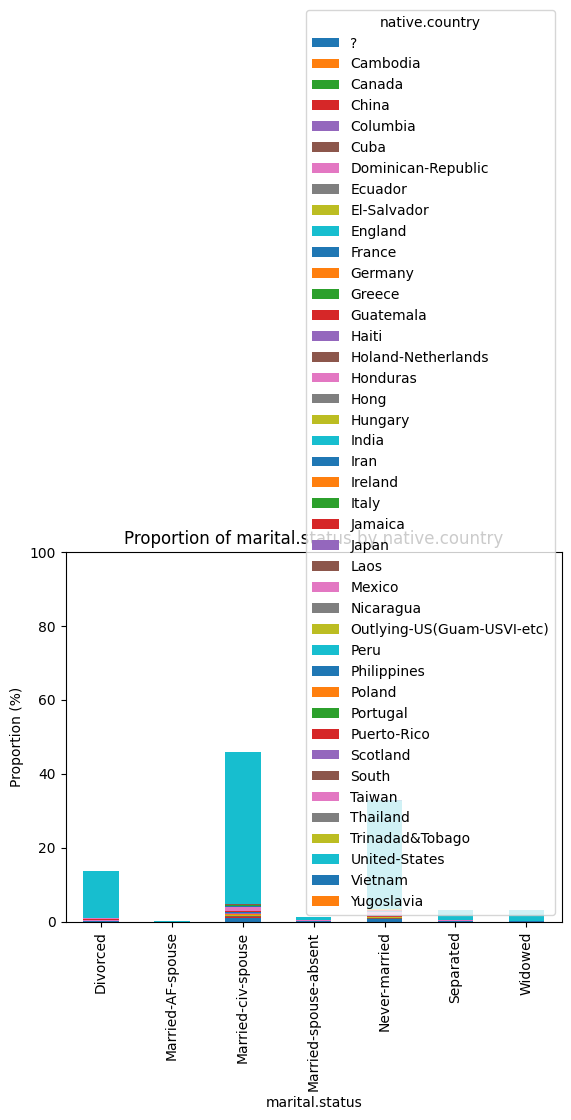

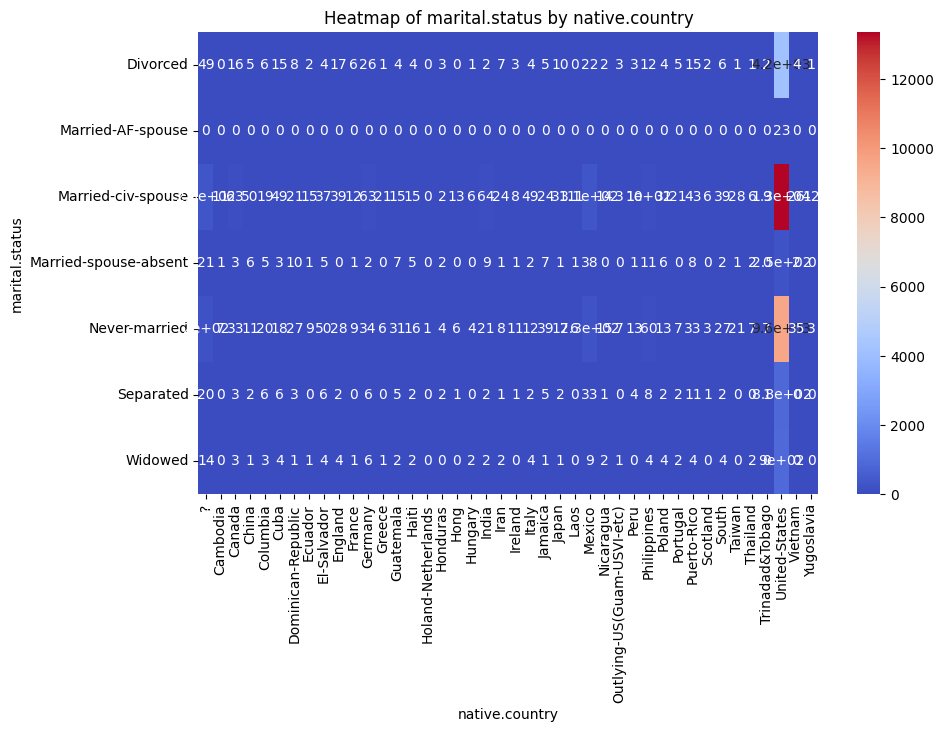

<Figure size 1000x600 with 0 Axes>

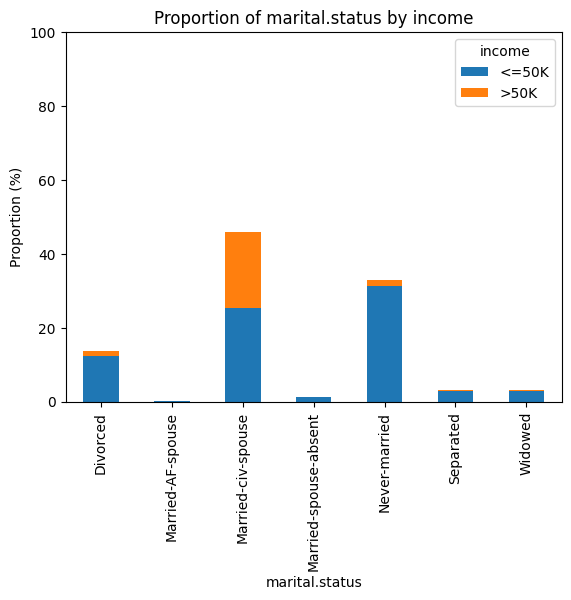

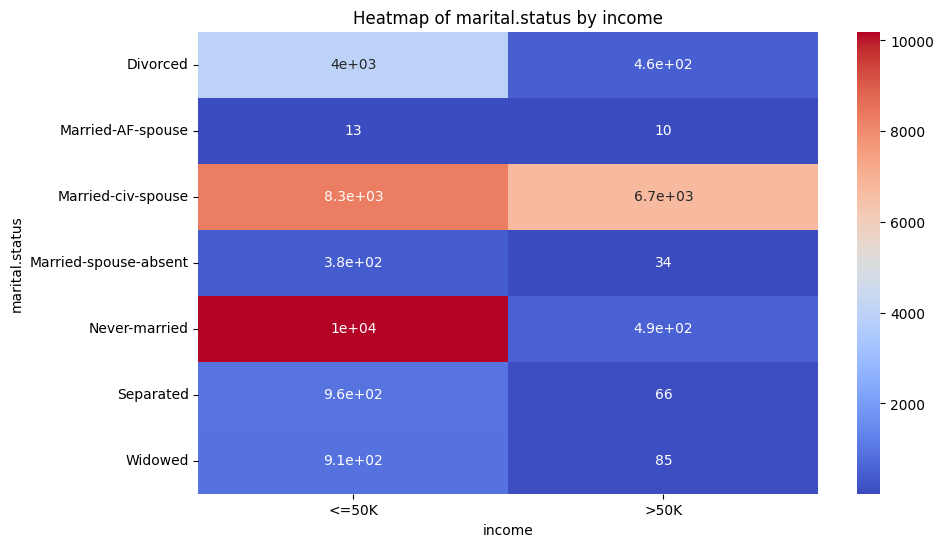

<Figure size 1000x600 with 0 Axes>

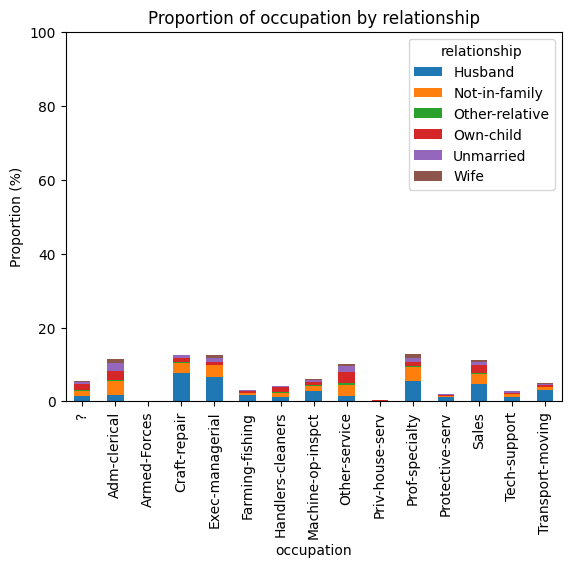

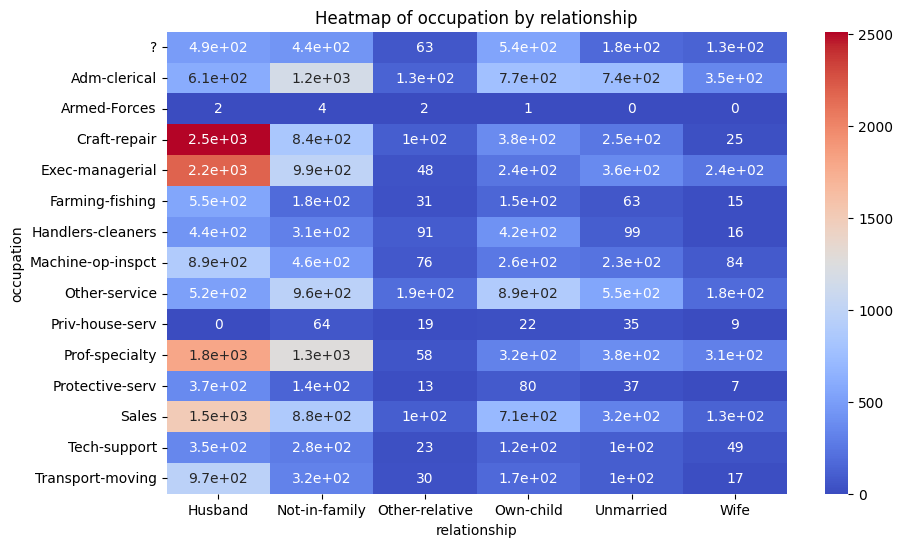

<Figure size 1000x600 with 0 Axes>

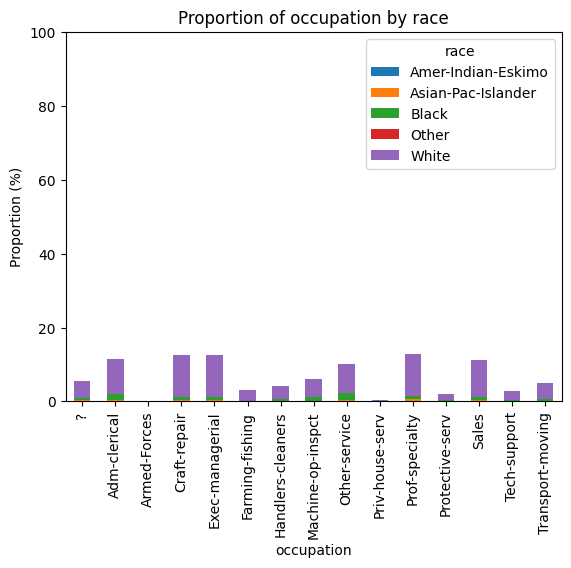

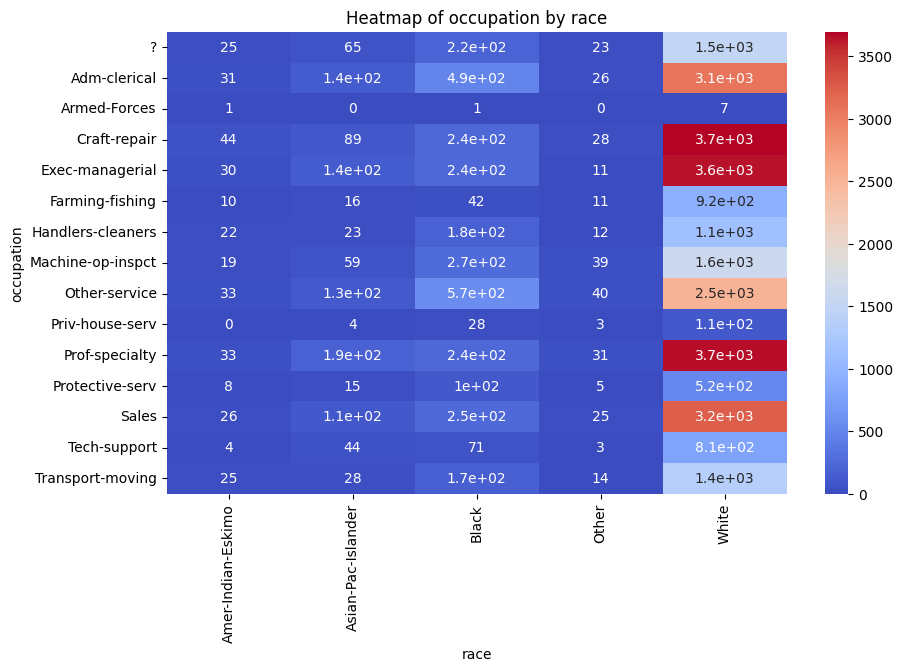

<Figure size 1000x600 with 0 Axes>

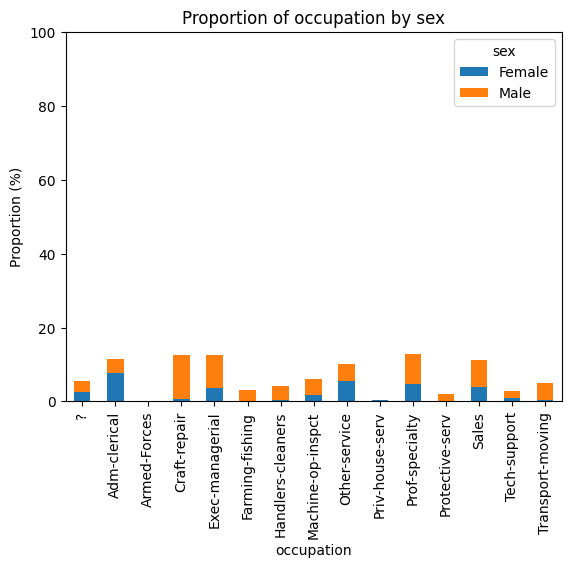

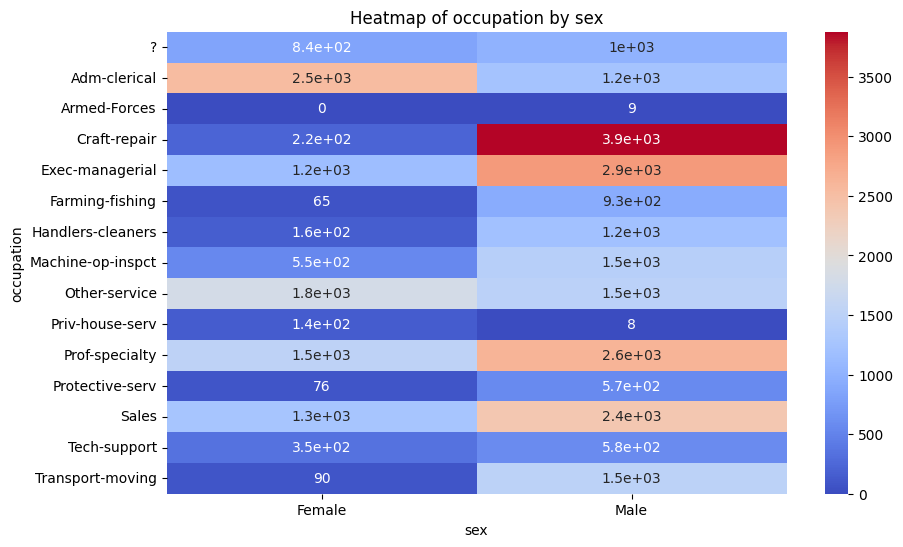

<Figure size 1000x600 with 0 Axes>

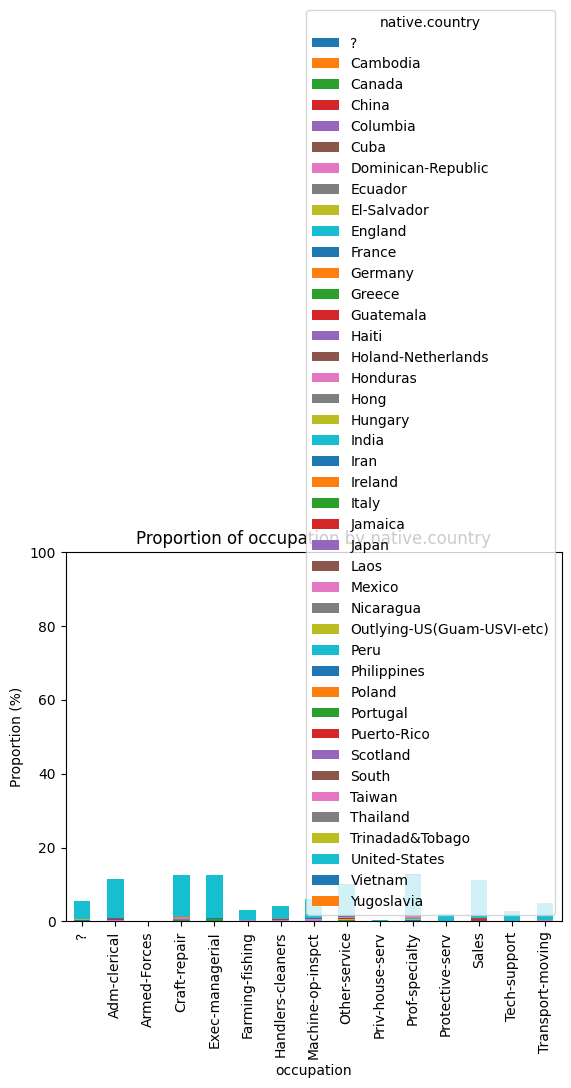

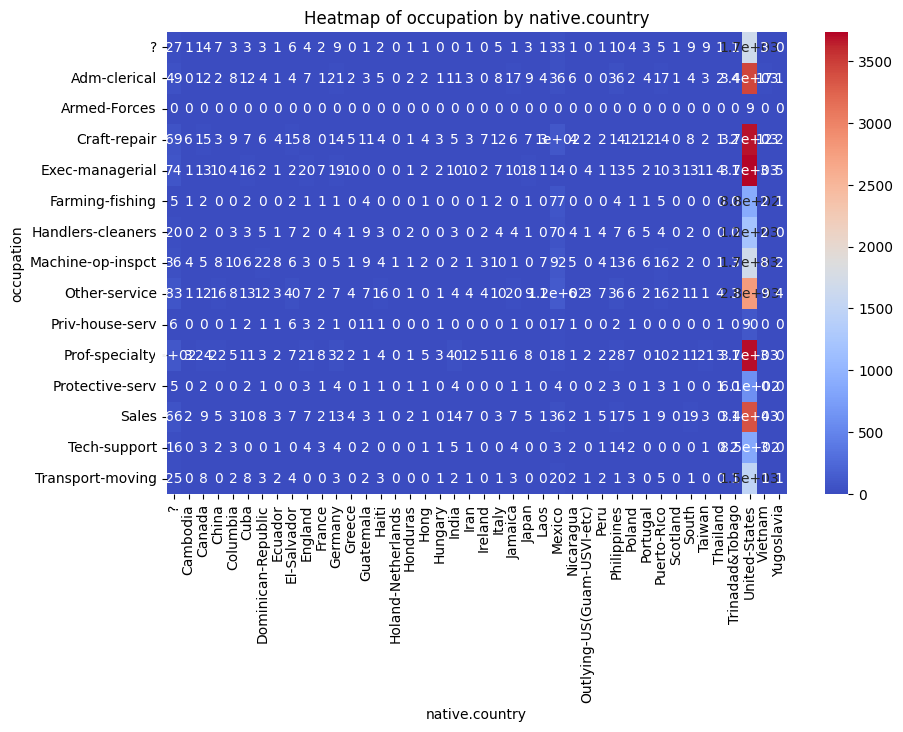

<Figure size 1000x600 with 0 Axes>

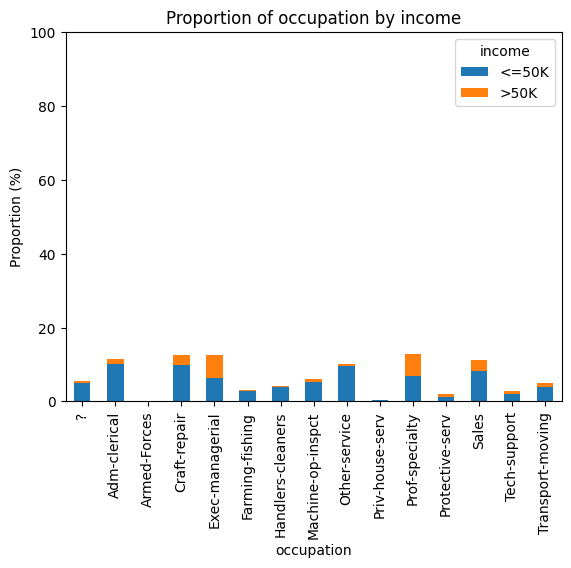

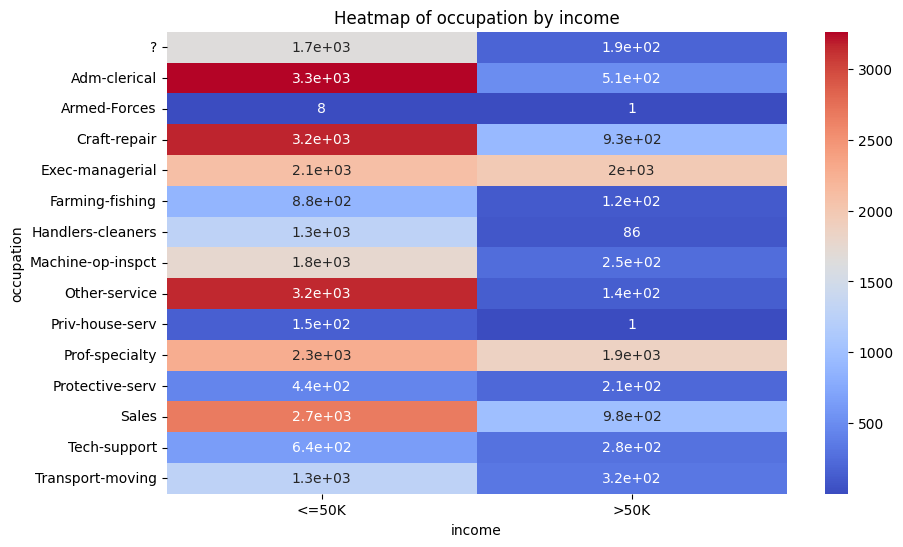

<Figure size 1000x600 with 0 Axes>

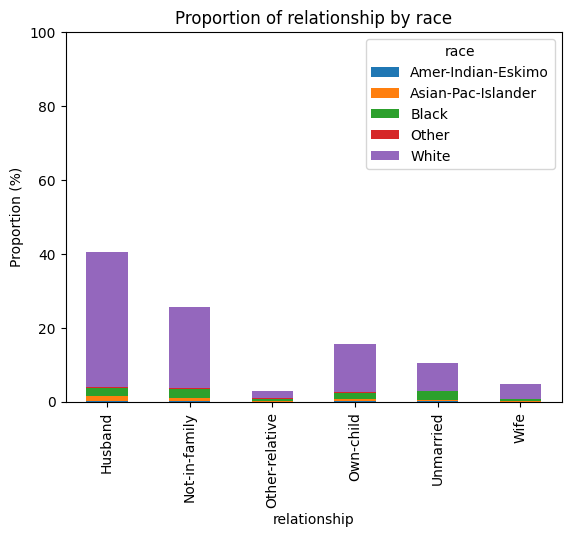

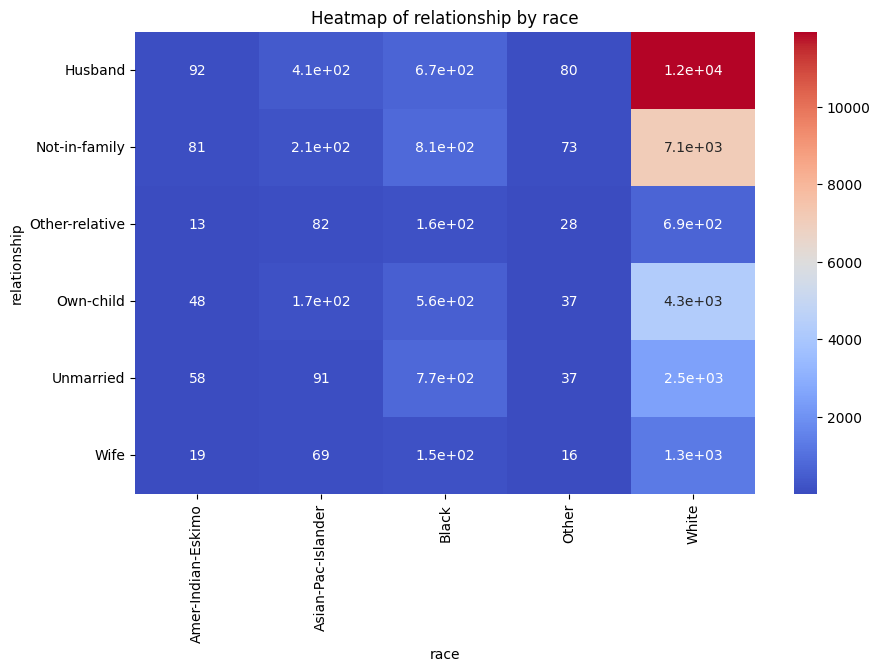

<Figure size 1000x600 with 0 Axes>

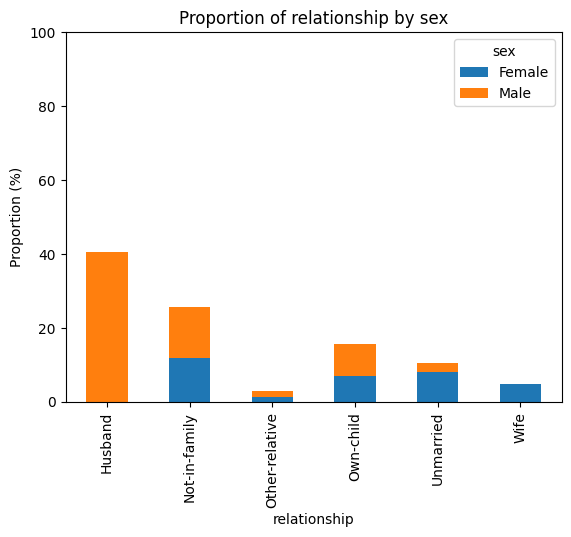

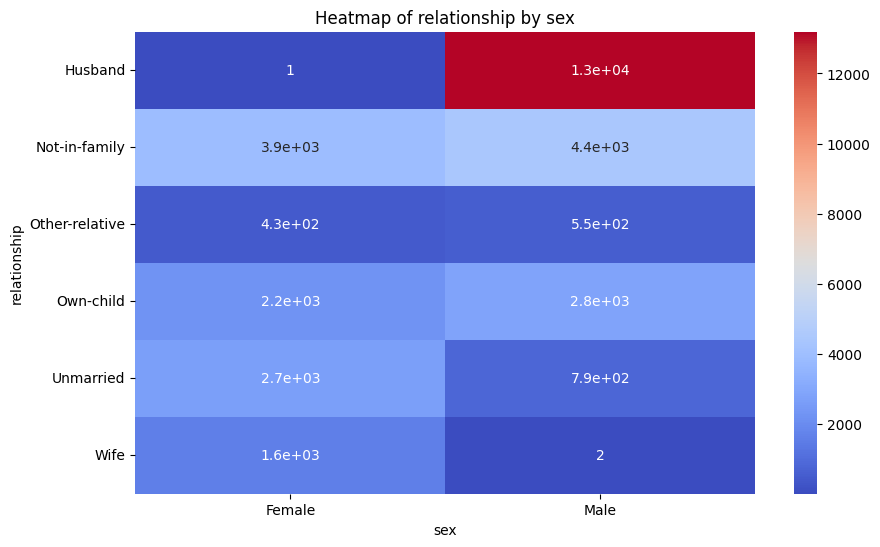

<Figure size 1000x600 with 0 Axes>

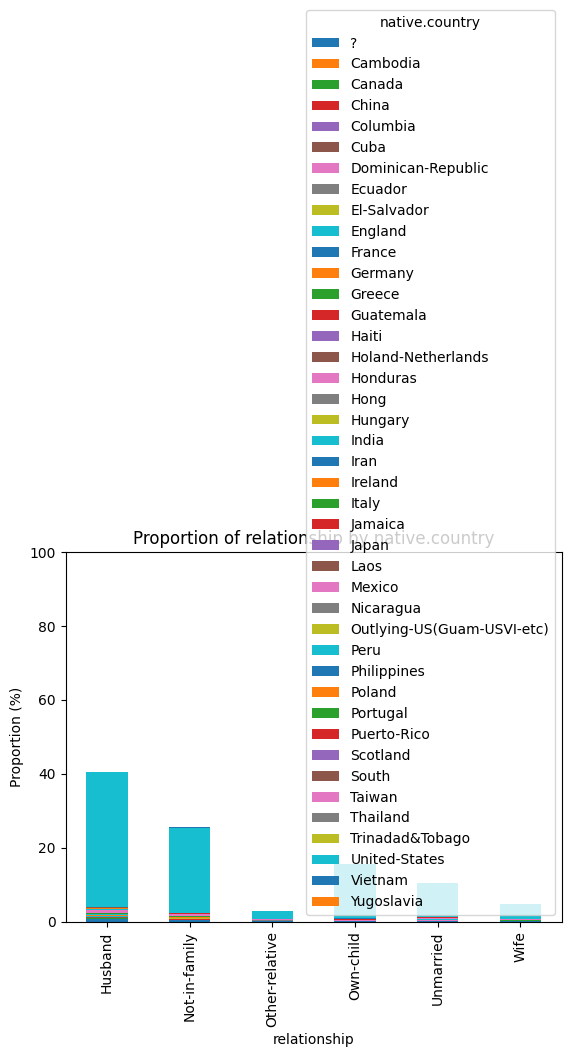

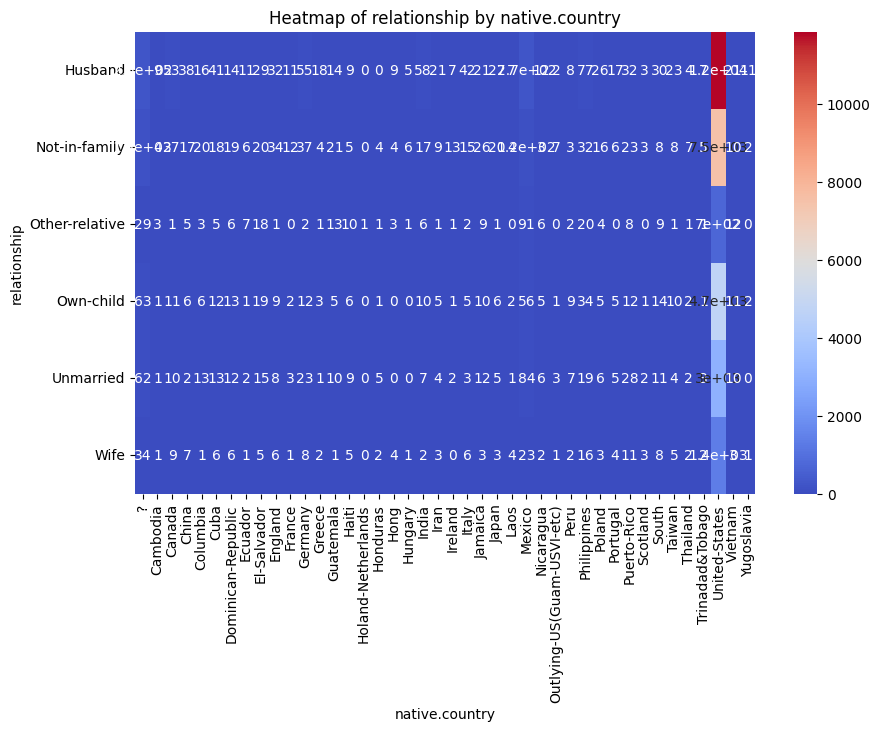

<Figure size 1000x600 with 0 Axes>

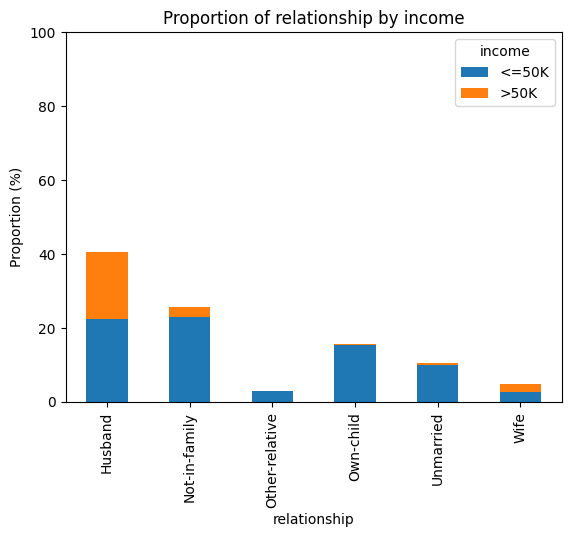

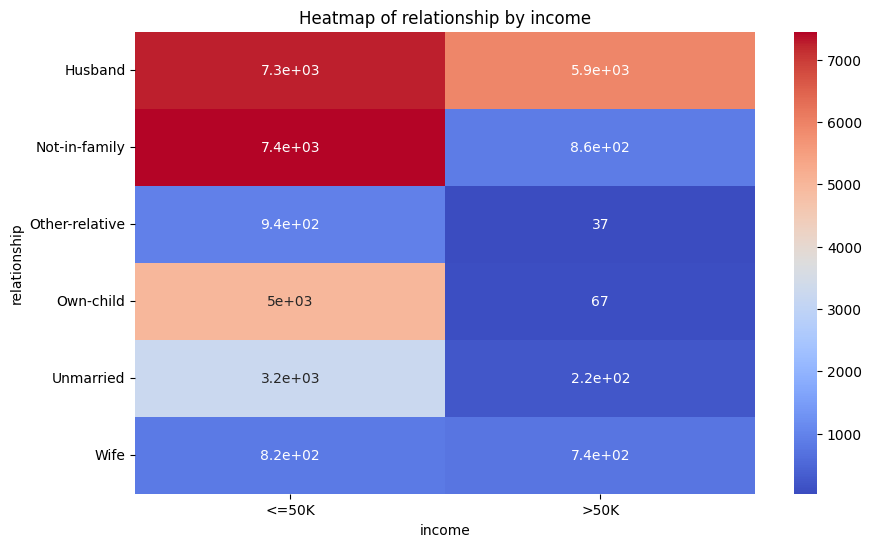

<Figure size 1000x600 with 0 Axes>

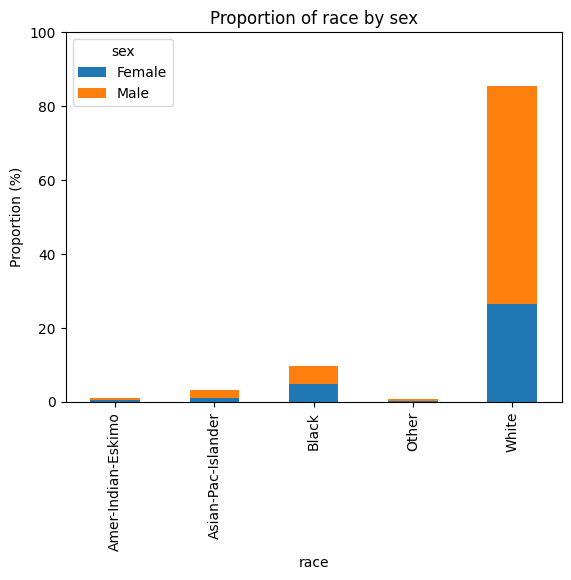

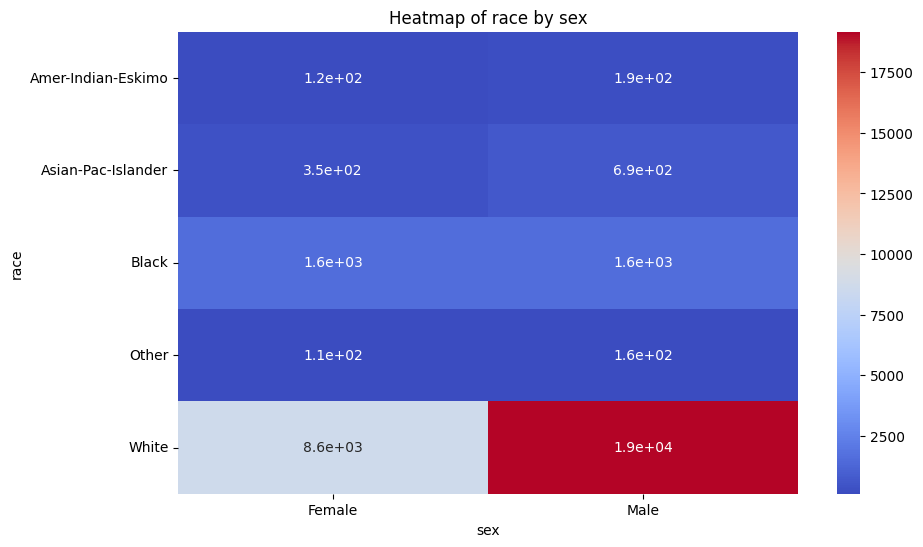

<Figure size 1000x600 with 0 Axes>

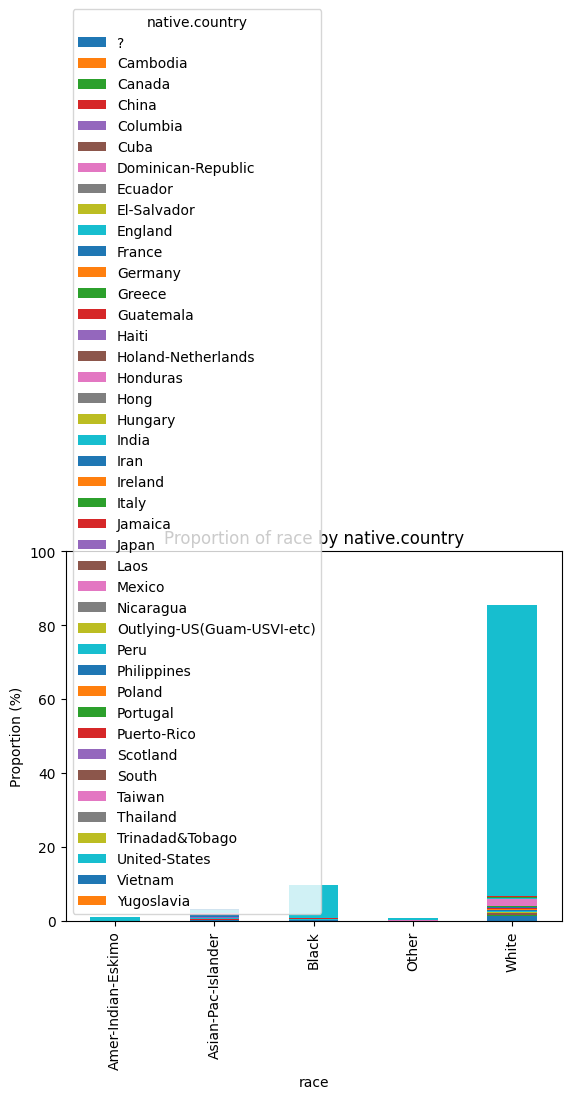

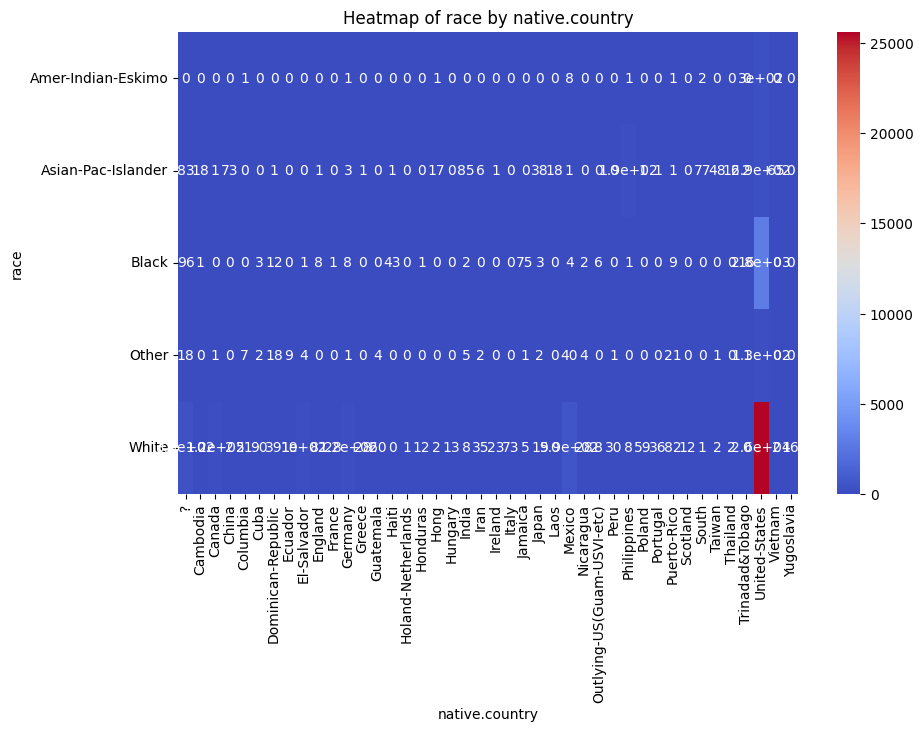

<Figure size 1000x600 with 0 Axes>

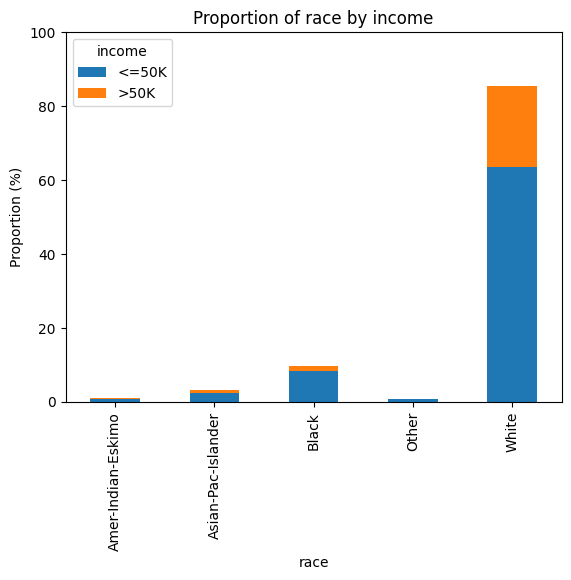

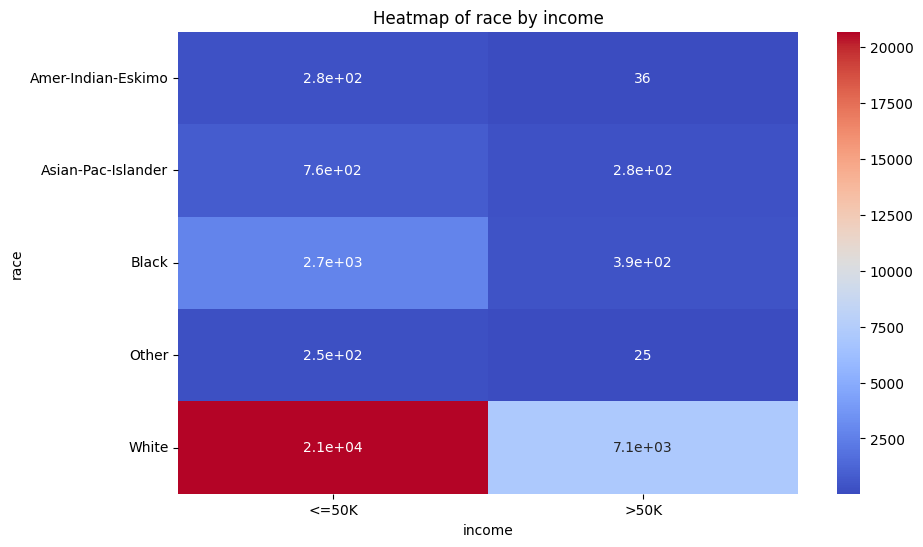

<Figure size 1000x600 with 0 Axes>

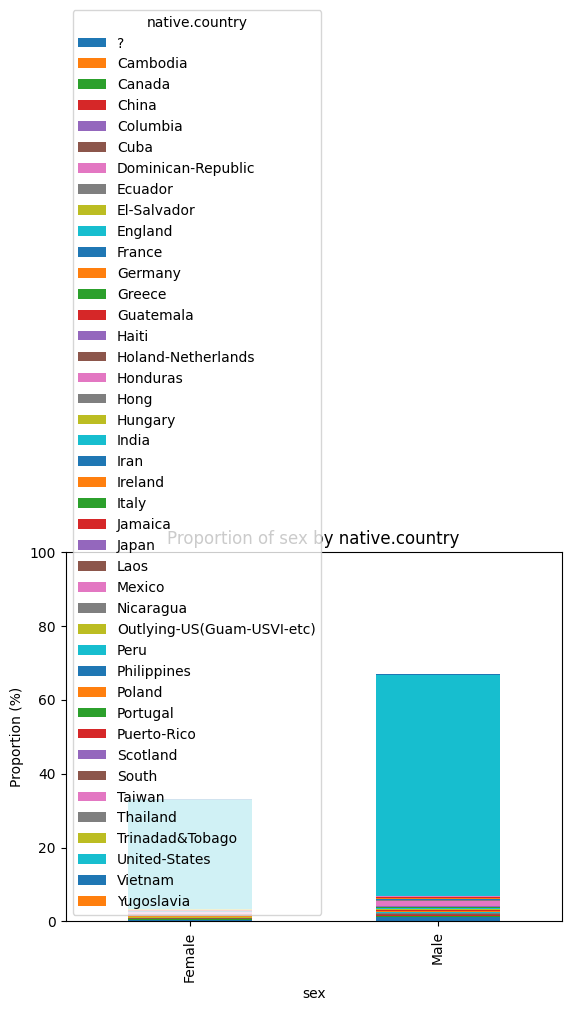

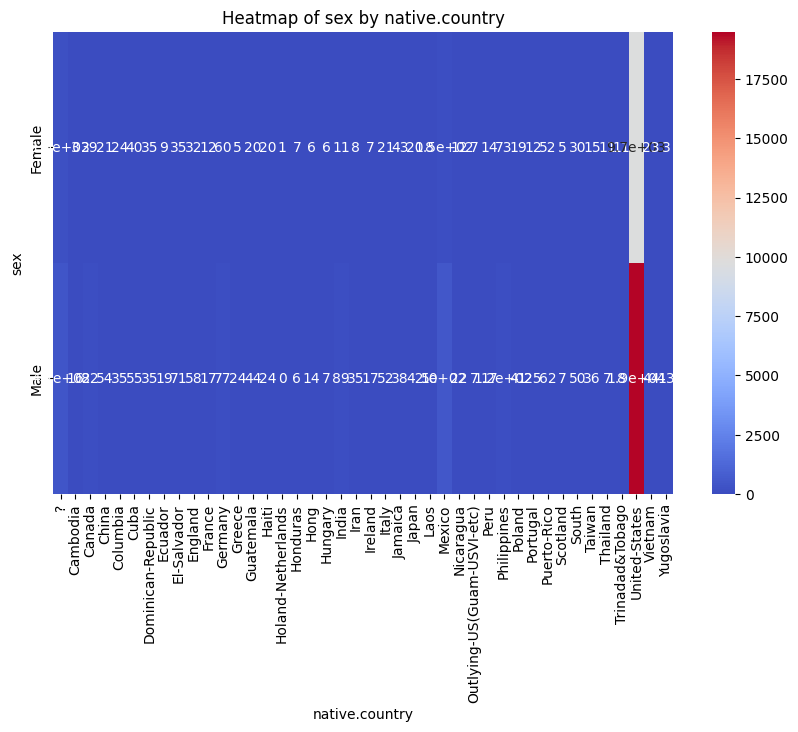

<Figure size 1000x600 with 0 Axes>

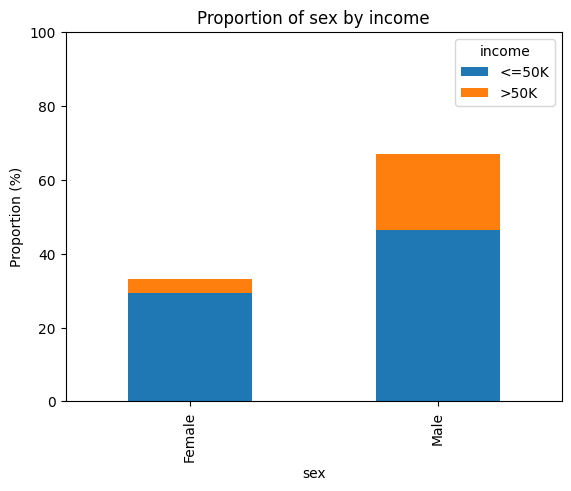

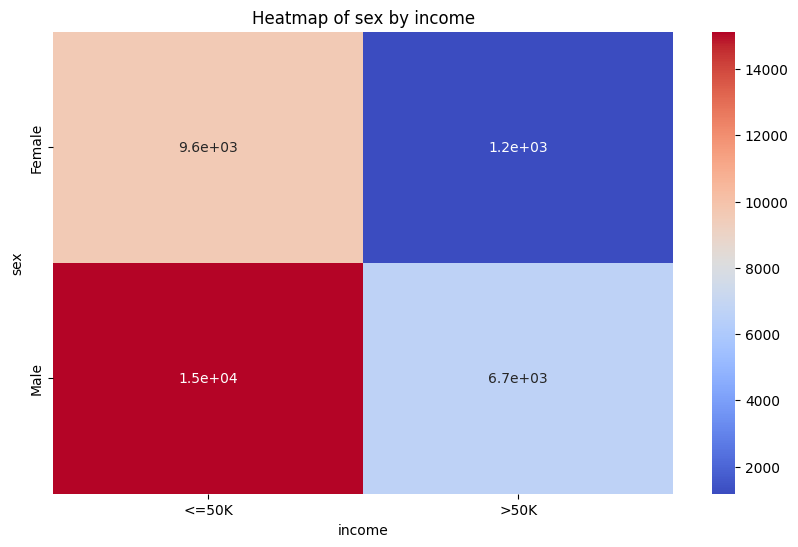

<Figure size 1000x600 with 0 Axes>

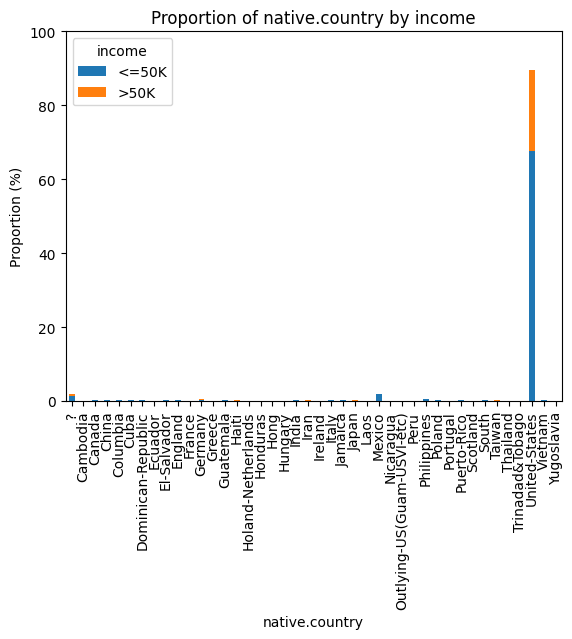

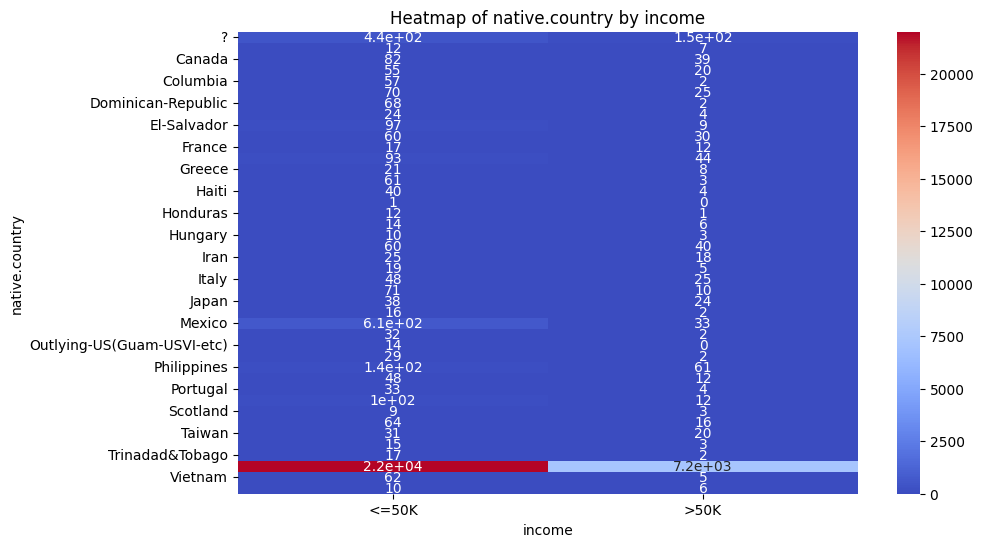

In [7]:
compared_classes = set()
for col1 in df.select_dtypes(include=['category']).columns:
    for col2 in df.select_dtypes(include=['category']).columns:
        if col1 != col2 and (col1, col2) not in compared_classes and (col2, col1) not in compared_classes:
            compared_classes.add((col1, col2))
            plt.figure(figsize=(10, 6))
            (df[[col1, col2]].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked=True)
            plt.title(f"Proportion of {col1} by {col2}")
            plt.xlabel(col1)
            plt.ylabel("Proportion (%)")
            plt.ylim(0, 100)
            plt.show()
            plt.figure(figsize=(10, 6))
            heatmap_data = df[[col1, col2]].value_counts().unstack(fill_value=0)
            sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
            plt.title(f"Heatmap of {col1} by {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()

## Exploration of Numeric Variables

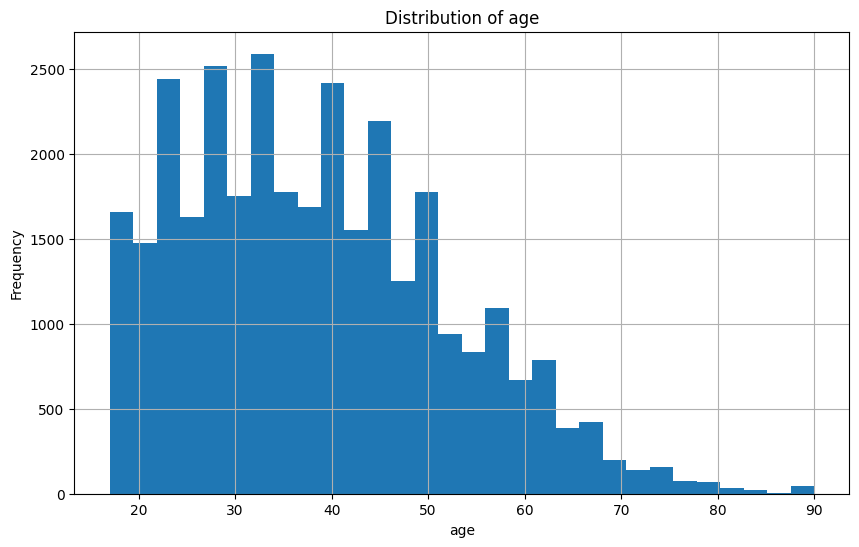

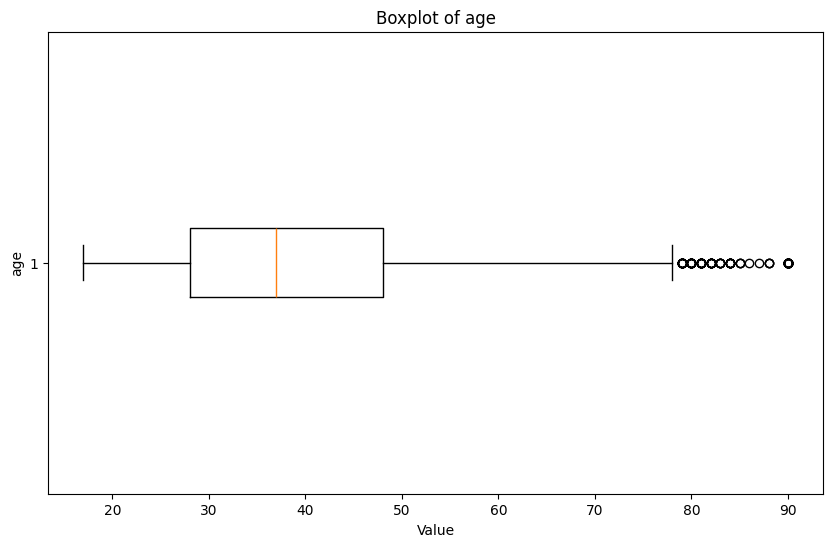

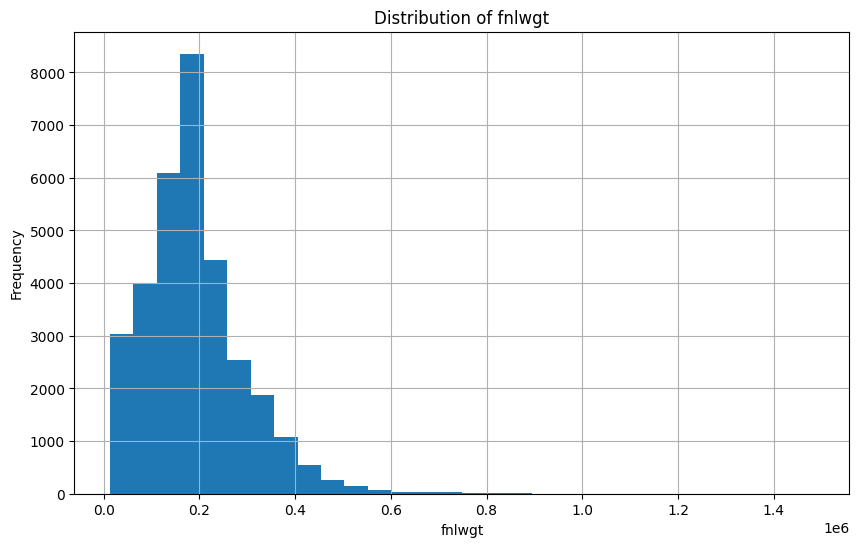

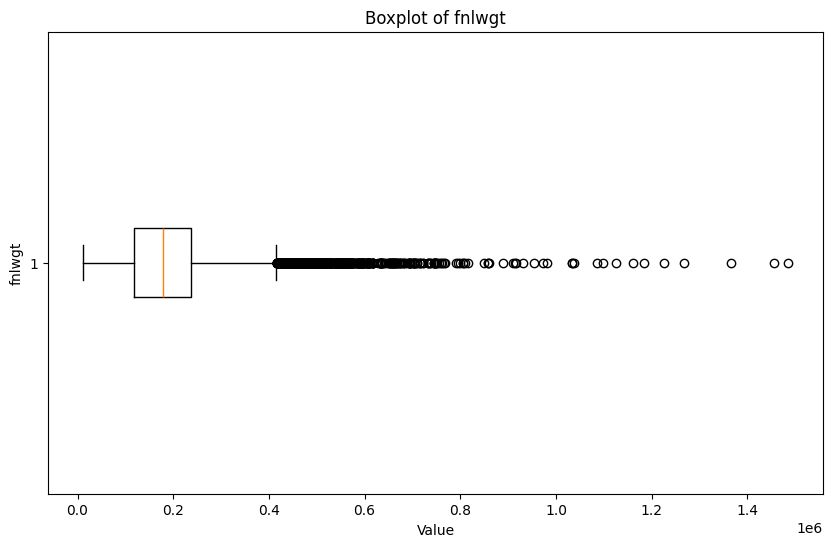

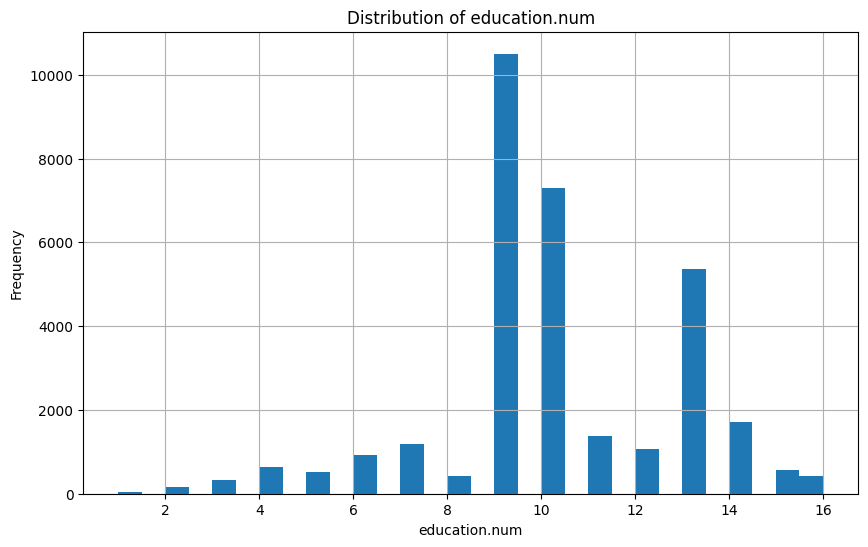

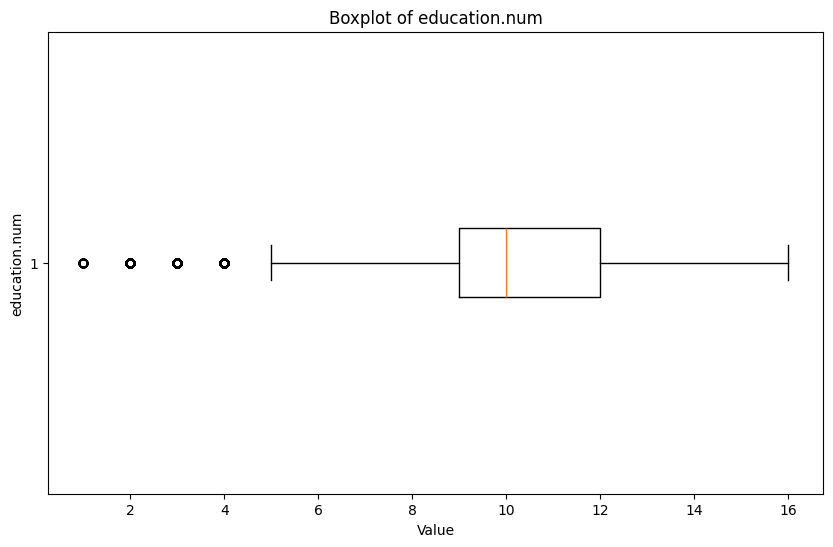

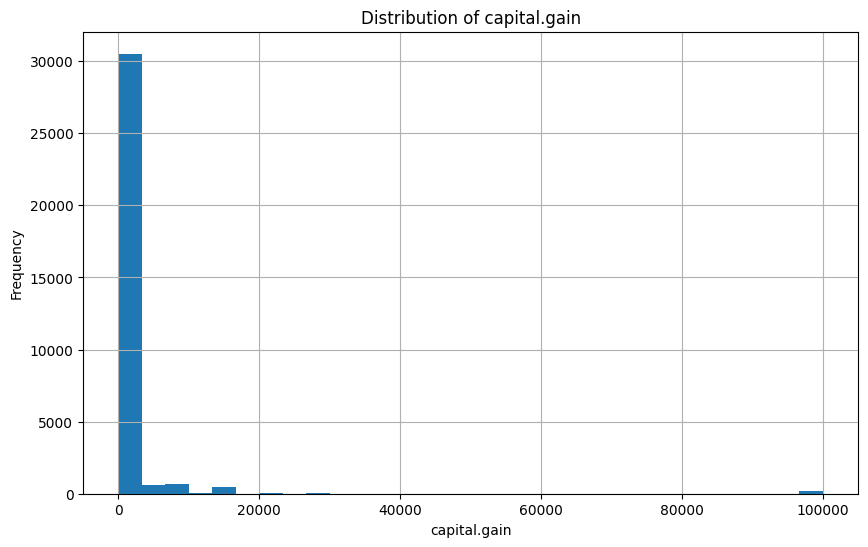

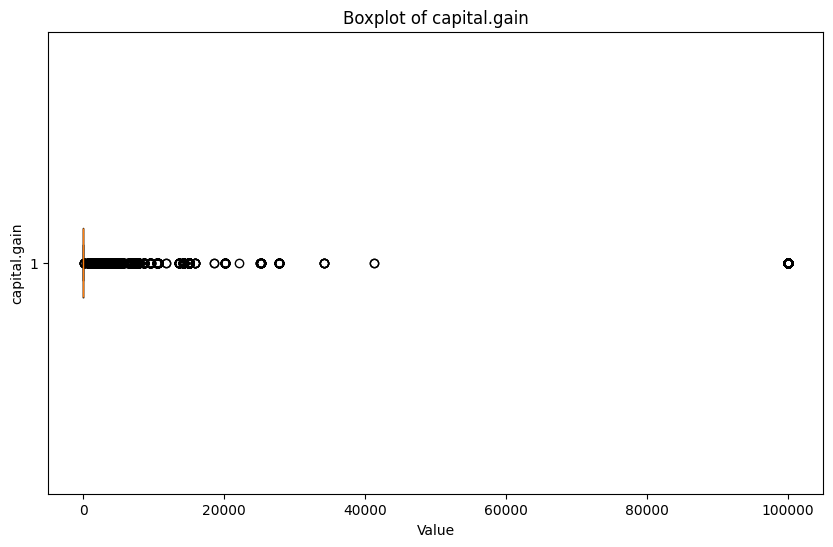

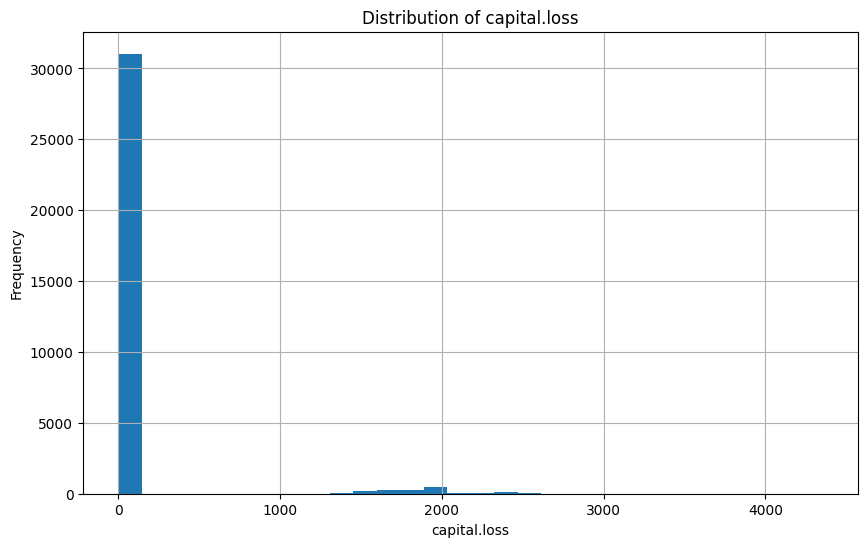

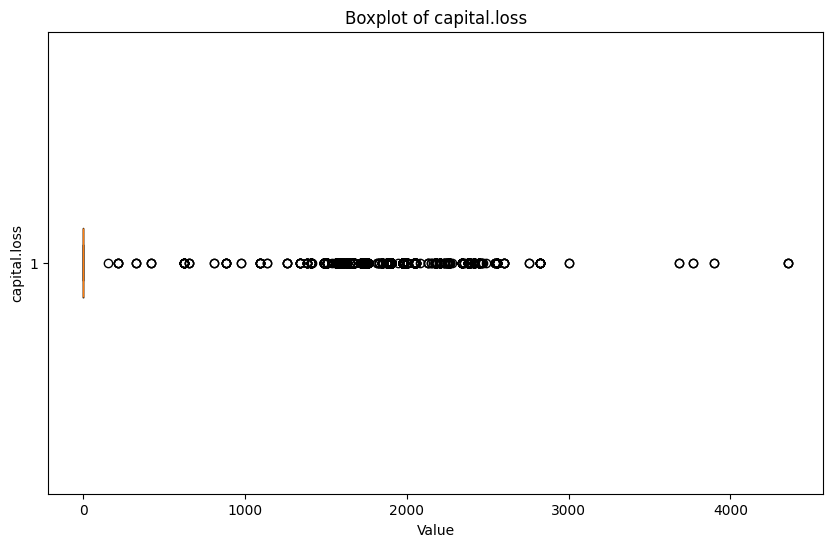

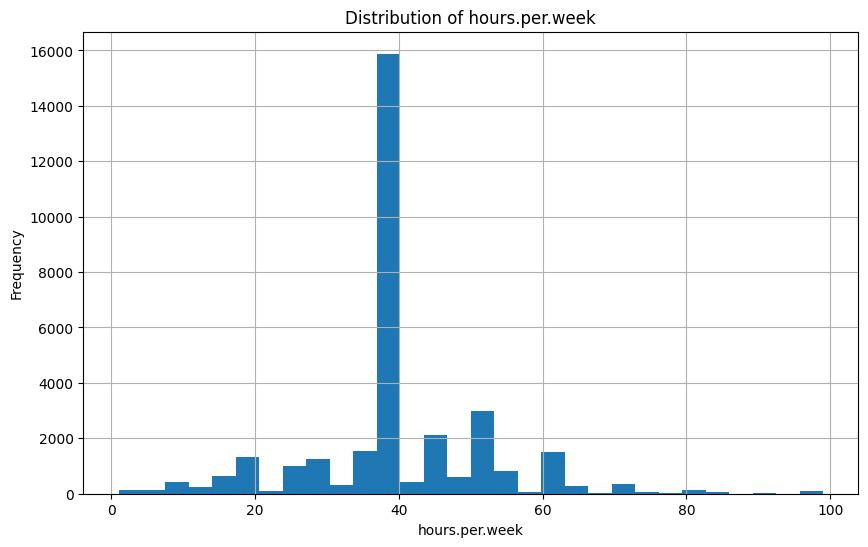

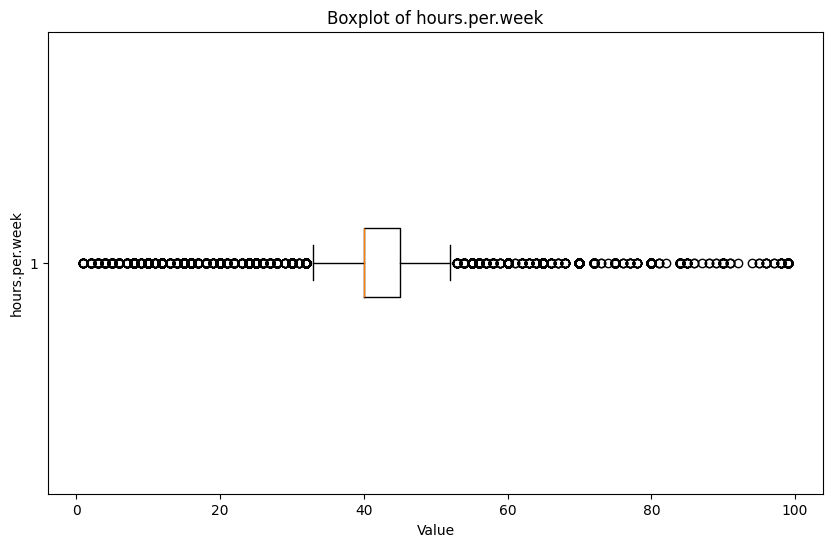

In [8]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col], orientation='horizontal')
    plt.title(f"Boxplot of {col}")
    plt.xlabel("Value")
    plt.ylabel(col)
    plt.show()